In [1]:
# Questions for more insight on the dataset
"""
1. What does each column represent in terms of medical parameters related to breast cancer?

2. Are there specific protocols or methodologies used in data collection that might affect interpretation?

3. What are the key differences between 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
   and their corresponding '_worst' and '_se' counterparts?

4. How do 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', and their related 
   features contribute to diagnosing breast cancer?  

5. Which features are most strongly correlated with the diagnosis of breast cancer ('diagnosis' column)?

6. Are there any redundant features that can be excluded from analysis?

7. What patterns or trends in the dataset might help in predicting the severity of breast cancer (Malignant vs. Benign)?

8.Can we identify distinct clusters of patient profiles based on these features?

9.How do the mean, standard error (se), and worst values of various features relate to each other within 
   the dataset?

10.Are there any geographical, demographic, or genetic factors that might influence the observed patterns?

"""
# Column or Feature Description
"""
1.  id: An identifier for each patient.

2.  diagnosis: The diagnosis of the breast tissues ('M' = malignant, 'B' = benign).

3.  radius_mean: Mean of distances from center to points on the perimeter.
    radius_se: Standard error for the radius
    radius_worst: "Worst" or largest mean radius.

4.  texture_mean: Standard deviation of gray-scale values.
    texture_se: Standard error for texture.
    texture_worst: "Worst" texture.

5.  perimeter_mean: Mean size of the core tumor area.
    perimeter_se: Standard error for perimeter.
    perimeter_worst: "Worst" perimeter.

6.  area_mean: Mean area of the tumor.
    area_se: Standard error for area.
    area_worst: "Worst" area.

7.  smoothness_mean: Mean of local variation in radius lengths.
    smoothness_se: Standard error for smoothness.
    smoothness_worst: "Worst" smoothness.

8.  compactness_mean: Mean of (perimeter^2 / area - 1.0).
    compactness_se: Standard error for compactness
    compactness_worst: "Worst" compactness.

9.  concavity_mean: Mean of the severity of concave portions of the contour.
    concavity_se: Standard error for concavity.
    concavity_worst: "Worst" concavity.

10. concave points_mean: Mean number of concave portions of the contour.
    concave points_se: Standard error for concave points.
    concave points_worst: "Worst" concave points.

11. symmetry_mean: Mean symmetry of the tumor.
    symmetry_se: Standard error for symmetry.
    symmetry_worst: "Worst" symmetry.

22. fractal_dimension_mean: Mean "coastline approximation" - 1.
    fractal_dimension_se: Standard error for fractal dimension.
    fractal_dimension_worst: "Worst" fractal dimension.
"""

# Objectives for Brast Cancer (Data Analysis)
"""
To understand the distribution and basic statistics of each feature.

To identify missing values and outliers.

To visualize the data to identify patterns and relationships.

To determine which features are most strongly correlated with the diagnosis.

To identify the most significant features for predicting malignancy and Benign.

To explore relationships between features using scatter plots, histograms, and box plots.

To build a classification model to predict whether a tumor is benign or malignant based on the features.

To compare different classification algorithms (e.g., Logistic Regression, Decision Trees, Random Forests, SVM)
to determine the best model.

To evaluate model performance using metrics like accuracy, precision, recall, F1-score, and ROC-AUC.

To perform cross-validation to ensure the model generalizes well to unseen data.

To assess the importance of each feature in the final model.

To check if the dataset is imbalanced (i.e., there are significantly more benign cases than malignant or vice versa).

To apply techniques to handle imbalanced data if necessary (e.g., resampling, SMOTE).

To split the data into training and testing sets.

To ensure the model performs well on the testing set and validate it with cross-validation.


"""

'\nTo understand the distribution and basic statistics of each feature.\n\nTo identify missing values and outliers.\n\nTo visualize the data to identify patterns and relationships.\n\nTo determine which features are most strongly correlated with the diagnosis.\n\nTo identify the most significant features for predicting malignancy and Benign.\n\nTo explore relationships between features using scatter plots, histograms, and box plots.\n\nTo build a classification model to predict whether a tumor is benign or malignant based on the features.\n\nTo compare different classification algorithms (e.g., Logistic Regression, Decision Trees, Random Forests, SVM)\nto determine the best model.\n\nTo evaluate model performance using metrics like accuracy, precision, recall, F1-score, and ROC-AUC.\n\nTo perform cross-validation to ensure the model generalizes well to unseen data.\n\nTo assess the importance of each feature in the final model.\n\nTo check if the dataset is imbalanced (i.e., there are 

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from scipy import stats
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFE, SelectFromModel
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [3]:
# Load the dataset
df = pd.read_csv("cancer_data.csv")
df.head()



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,Concavity mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,100701.0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,100702.0,M,2000.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,100703.0,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,100704.0,M,1100.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,100705.0,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Number of rows
num_of_rows = len(df)
print(f"Number of rows : {num_of_rows}")

Number of rows : 574


In [5]:
## Data Preprocessing / Cleaning
# 1. Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

id                         8
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
Concavity mean             3
concave points_mean        2
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [6]:
# Missing percentage
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)

id                         1.393728
diagnosis                  0.000000
radius_mean                0.000000
texture_mean               0.000000
perimeter_mean             0.000000
area_mean                  0.000000
smoothness_mean            0.000000
compactness_mean           0.000000
Concavity mean             0.522648
concave points_mean        0.348432
symmetry_mean              0.000000
fractal_dimension_mean     0.000000
radius_se                  0.000000
texture_se                 0.000000
perimeter_se               0.000000
area_se                    0.000000
smoothness_se              0.000000
compactness_se             0.000000
concavity_se               0.000000
concave points_se          0.000000
symmetry_se                0.000000
fractal_dimension_se       0.000000
radius_worst               0.000000
texture_worst              0.000000
perimeter_worst            0.000000
area_worst                 0.000000
smoothness_worst           0.000000
compactness_worst          0

In [7]:
# Check for missing values in 'concavity mean' column
missing_values = df['Concavity mean'].isnull().sum()
print(f'Missing values in Concavity mean: {missing_values}')

# Summary statistics
mean_value = df['Concavity mean'].mean()
median_value = df['Concavity mean'].median()
mode_value = df['Concavity mean'].mode()[0]

print(f'Mean: {mean_value}')
print(f'Median: {median_value}')
print(f'Mode: {mode_value}')

Missing values in Concavity mean: 3
Mean: 0.08867420437828372
Median: 0.06181
Mode: 0.0


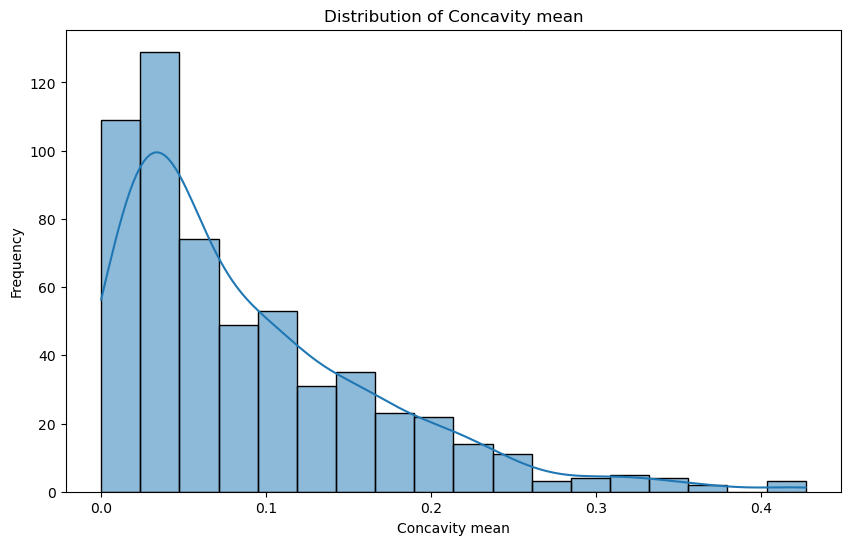

In [8]:
# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Concavity mean'].dropna(), kde=True)
plt.title('Distribution of Concavity mean')
plt.xlabel('Concavity mean')
plt.ylabel('Frequency')
plt.show()

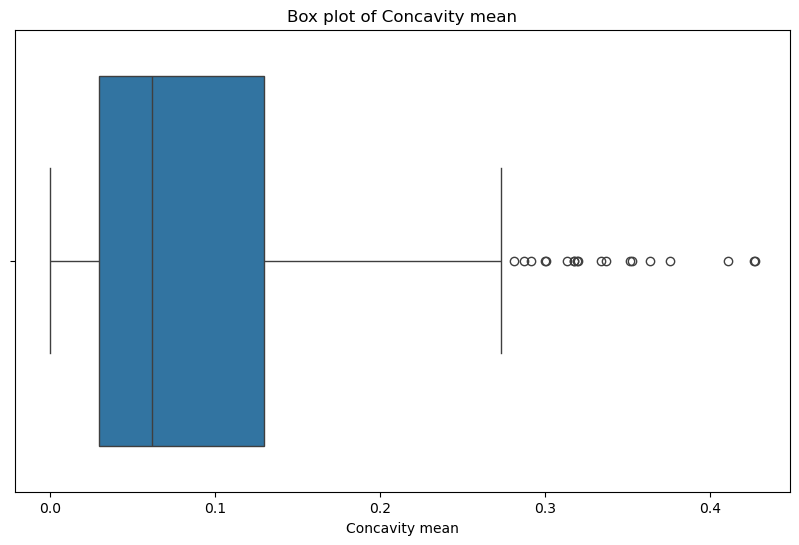

In [9]:
# Box plot to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Concavity mean'].dropna())
plt.title('Box plot of Concavity mean')
plt.xlabel('Concavity mean')
plt.show()

In [10]:
# impute missing values with median 
df['Concavity mean'] = df['Concavity mean'].fillna(df['Concavity mean'].median())

In [11]:
# Evaluation 'concavity mean' column
missing_values = df['Concavity mean'].isnull().sum()
print(f'Missing values in Concavity mean: {missing_values}')

# Summary statistics
mean_value = df['Concavity mean'].mean()
median_value = df['Concavity mean'].median()
mode_value = df['Concavity mean'].mode()[0]

print(f'Mean: {mean_value}')
print(f'Median: {median_value}')
print(f'Mode: {mode_value}')

Missing values in Concavity mean: 0
Mean: 0.08853379912891986
Median: 0.06181
Mode: 0.0


In [12]:
# Check for missing values in 'concave points_mean' column
missing_values = df['concave points_mean'].isnull().sum()
print(f'Missing values in concave points_mean: {missing_values}')

# Summary statistics
mean_value = df['concave points_mean'].mean()
median_value = df['concave points_mean'].median()
mode_value = df['concave points_mean'].mode()[0]

print(f'Mean: {mean_value}')
print(f'Median: {median_value}')
print(f'Mode: {mode_value}')



Missing values in concave points_mean: 2
Mean: 0.04911437762237762
Median: 0.03387
Mode: 0.0


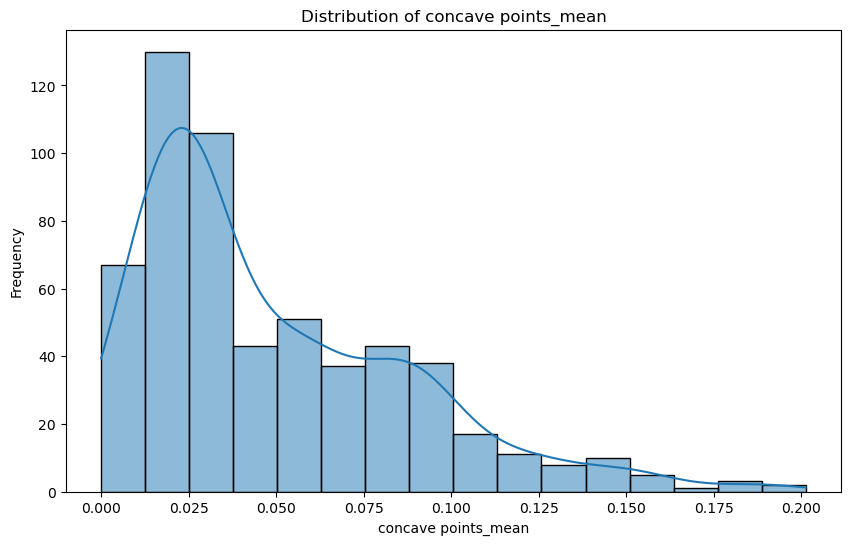

In [13]:
# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['concave points_mean'].dropna(), kde=True)
plt.title('Distribution of concave points_mean')
plt.xlabel('concave points_mean')
plt.ylabel('Frequency')
plt.show()

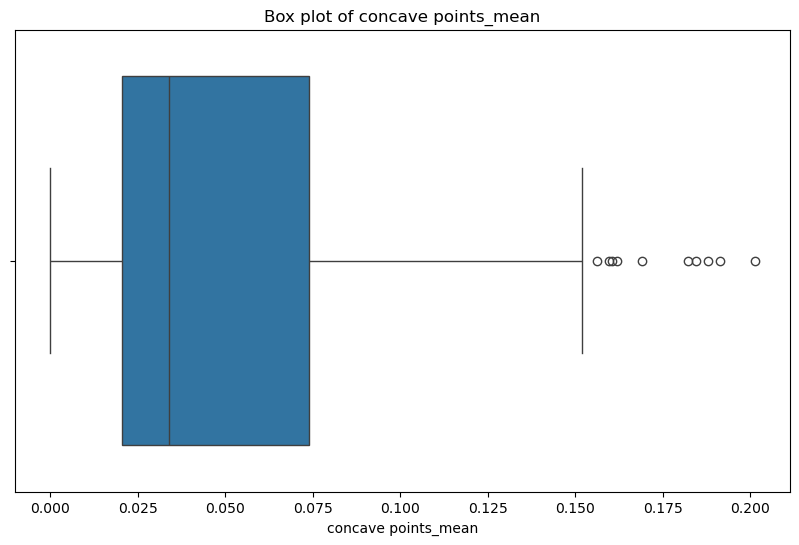

In [14]:
# Box plot to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['concave points_mean'].dropna())
plt.title('Box plot of concave points_mean')
plt.xlabel('concave points_mean')
plt.show()

In [15]:
# impute missing values with median 
df['concave points_mean'] = df['concave points_mean'].fillna(df['concave points_mean'].median())

In [16]:
# Check for missing values in 'concave points_mean' column
missing_values = df['concave points_mean'].isnull().sum()
print(f'Missing values in concave points_mean: {missing_values}')

# Summary statistics
mean_value = df['concave points_mean'].mean()
median_value = df['concave points_mean'].median()
mode_value = df['concave points_mean'].mode()[0]

print(f'Mean: {mean_value}')
print(f'Median: {median_value}')
print(f'Mode: {mode_value}')

Missing values in concave points_mean: 0
Mean: 0.04906126132404181
Median: 0.03387
Mode: 0.0


In [17]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

id                         8
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
Concavity mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [18]:
# 2. check for wrong format
print(df.dtypes)

id                         float64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
Concavity mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [19]:
# Check Non numeric values in numeric columns
# Select all numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

for column in numeric_columns:
    # Identify non-numeric values
    non_numeric = df[column].apply(lambda x: not pd.api.types.is_numeric_dtype(type(x)))
    if non_numeric.any():
        print(f"Non-numeric values found in column '{column}':")
        print(df[non_numeric][column])
    else:
        print(f"No non-numeric values found in column '{column}'.")


No non-numeric values found in column 'id'.
No non-numeric values found in column 'radius_mean'.
No non-numeric values found in column 'texture_mean'.
No non-numeric values found in column 'perimeter_mean'.
No non-numeric values found in column 'area_mean'.
No non-numeric values found in column 'smoothness_mean'.
No non-numeric values found in column 'compactness_mean'.
No non-numeric values found in column 'Concavity mean'.
No non-numeric values found in column 'concave points_mean'.
No non-numeric values found in column 'symmetry_mean'.
No non-numeric values found in column 'fractal_dimension_mean'.
No non-numeric values found in column 'radius_se'.
No non-numeric values found in column 'texture_se'.
No non-numeric values found in column 'perimeter_se'.
No non-numeric values found in column 'area_se'.
No non-numeric values found in column 'smoothness_se'.
No non-numeric values found in column 'compactness_se'.
No non-numeric values found in column 'concavity_se'.
No non-numeric value

In [20]:
# Check for inconsistent values in numeric columns

# Select all numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

negative_sum_per_column = {}

for column in numeric_columns:
    negative_rows = df[column] < 0
    total_sum = np.sum(negative_rows)
    negative_sum_per_column[column] = total_sum

for column, total_sum in negative_sum_per_column.items():
    print(f"Column '{column}' has {total_sum} rows with negative values.")    


Column 'id' has 0 rows with negative values.
Column 'radius_mean' has 0 rows with negative values.
Column 'texture_mean' has 0 rows with negative values.
Column 'perimeter_mean' has 0 rows with negative values.
Column 'area_mean' has 0 rows with negative values.
Column 'smoothness_mean' has 0 rows with negative values.
Column 'compactness_mean' has 0 rows with negative values.
Column 'Concavity mean' has 0 rows with negative values.
Column 'concave points_mean' has 0 rows with negative values.
Column 'symmetry_mean' has 0 rows with negative values.
Column 'fractal_dimension_mean' has 0 rows with negative values.
Column 'radius_se' has 0 rows with negative values.
Column 'texture_se' has 0 rows with negative values.
Column 'perimeter_se' has 0 rows with negative values.
Column 'area_se' has 0 rows with negative values.
Column 'smoothness_se' has 0 rows with negative values.
Column 'compactness_se' has 0 rows with negative values.
Column 'concavity_se' has 0 rows with negative values.
Co

In [21]:
# Checking for inconsistent values in diagnosis (object) column : categorical column
expected_diagnosis_values = ['M', 'B']
unexpected_values = df[~df['diagnosis'].isin(expected_diagnosis_values)]
if not unexpected_values.empty:
    print("Unexpected values found in 'diagnosis':")
    print(unexpected_values['diagnosis'].unique())


Unexpected values found in 'diagnosis':
['BB' 'MM']


In [74]:
# Correct inconsistent values in Diagnosis
correction_map = {
    'BB': 'B',
    'MM': 'M'
}

df.loc[:, 'diagnosis'].replace(correction_map, inplace=True)


/tmp/ipykernel_10739/4102195842.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.loc[:, 'diagnosis'].replace(correction_map, inplace=True)


In [23]:
expected_diagnosis_values = ['M', 'B']
unexpected_values = df[~df['diagnosis'].isin(expected_diagnosis_values)]
if not unexpected_values.empty:
    print("Unexpected values found in 'diagnosis':")
    print(unexpected_values['diagnosis'].unique())
else:
    print("No unexpected values.")    

No unexpected values.


In [24]:
# Checking for duplicates
duplicate_rows = df.duplicated()

num_duplicate_rows = duplicate_rows.sum()

print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 5


In [25]:
# Duplicated rows
if num_duplicate_rows > 0:
    print("Duplicate rows:")
    print(df[duplicate_rows])

Duplicate rows:
           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
569  101225.0         B        9.847         15.68           63.00      293.2   
570  100720.0         B       13.540         14.36           87.46      566.3   
571  101086.0         M       14.600         23.29           93.97      664.7   
572  100758.0         M       14.710         21.59           95.55      656.9   
573  101205.0         B        9.268         12.87           61.49      248.7   

     smoothness_mean  compactness_mean  Concavity mean  concave points_mean  \
569          0.09492           0.08419         0.02330              0.02416   
570          0.09779           0.08129         0.06664              0.04781   
571          0.08682           0.06636         0.08390              0.05271   
572          0.11370           0.13650         0.12930              0.08123   
573          0.16340           0.22390         0.09730              0.05252   

     ...  radius_worst

In [76]:
# Remove duplicates

df.drop_duplicates(inplace=True)


In [27]:
duplicate_rows = df.duplicated()

num_duplicate_rows = duplicate_rows.sum()

print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 0


In [28]:
# Number of rows
num_of_rows = len(df)
print(f"Number of rows : {num_of_rows}")

Number of rows : 569


In [29]:
## Exploratory Data Analysis (EDA)
# 1. descriptive statistics:

# List of numeric columns (excluding 'diagnosis')
numeric_columns = df.select_dtypes(include=['float64']).columns
numeric_columns = numeric_columns.drop('id')
# Initialize a dictionary to store summary statistics
summary_statistics = {}

# Calculate summary statistics for each numeric feature
for column in numeric_columns:
    summary_statistics[column] = {
        'mean': df[column].mean(),
        'median': df[column].median(),
        'mode': df[column].mode().values[0],  # mode() returns a Series
        'std_dev': df[column].std(),
        'min': df[column].min(),
        'max': df[column].max(),
        '25%': df[column].quantile(0.25),
        '50%': df[column].quantile(0.50),  # Same as median
        '75%': df[column].quantile(0.75)
    }

summary_df = pd.DataFrame(summary_statistics).T # Transpose to match the desired format
print(summary_df)

                               mean      median        mode     std_dev  \
radius_mean               19.520965   13.380000   12.340000   94.909505   
texture_mean              19.289649   18.840000   14.930000    4.301036   
perimeter_mean            91.969033   86.240000   82.610000   24.298981   
area_mean                654.889104  551.100000  512.200000  351.914129   
smoothness_mean            0.096360    0.095870    0.100700    0.014064   
compactness_mean           0.104341    0.092630    0.114700    0.052813   
Concavity mean             0.088608    0.061810    0.000000    0.079444   
concave points_mean        0.049038    0.033840    0.000000    0.038704   
symmetry_mean              0.181162    0.179200    0.160100    0.027414   
fractal_dimension_mean     0.062798    0.061540    0.056670    0.007060   
radius_se                  0.405172    0.324200    0.220400    0.277313   
texture_se                 1.216853    1.108000    0.856100    0.551648   
perimeter_se             

In [30]:
# 2. Skewness and Kurtosis
# Skewness and kurtosis are two statistical measures that describe the shape and distribution of data. 
# Skewness:
#      Skewness measures the asymmetry of the data distribution. It tells us how much the distribution 
#      of a dataset deviates from a normal distribution.
"""
1. Positive Skewness: the data distribution has a long right tail. 
     This means that the right side (higher values) of the distribution is longer or fatter than the left side.

2. Negative Skewness:  the data distribution has a long left tail. 
      This means that the left side (lower values) of the distribution is longer or fatter than the right side.

3. Zero Skewness: If the skewness is zero, the data distribution is perfectly symmetrical.

"""
# Kurtosis:
#       Kurtosis measures the "tailedness" of the data distribution. It tells us how heavy or light the 
#       tails of the distribution are compared to a normal distribution.
"""
1. Leptokurtic: If the kurtosis is greater than 3, the distribution has heavier tails and a sharper peak 
   compared to a normal distribution. This indicates more outliers.

2. Platykurtic: If the kurtosis is less than 3, the distribution has lighter tails and a flatter peak 
   compared to a normal distribution. This indicates fewer outliers. 

3. Mesokurtic: If the kurtosis is exactly 3, the distribution has tails similar to a normal distribution.     
"""

"""
By adding skewness and kurtosis to your data analysis, you can gain deeper insights into the shape and 
distribution of your data, which can be crucial for selecting appropriate modeling techniques and 
understanding potential biases in your dataset.
"""


'\nBy adding skewness and kurtosis to your data analysis, you can gain deeper insights into the shape and \ndistribution of your data, which can be crucial for selecting appropriate modeling techniques and \nunderstanding potential biases in your dataset.\n'

In [31]:
numeric_columns = df.select_dtypes(include=['float64']).columns
numeric_columns = numeric_columns.drop('id')

shape_statistics = {}

for column in numeric_columns:
    shape_statistics[column] = {
        'skewness': skew(df[column].dropna()),  
        'kurtosis': kurtosis(df[column].dropna(), fisher=True)  # Fisher=True gives normal kurtosis (excess kurtosis)
    }


shape_df = pd.DataFrame(shape_statistics).T  # Transpose to match the desired format

# Display the skewness and kurtosis
print(shape_df)

                          skewness    kurtosis
radius_mean              18.627255  361.448599
texture_mean              0.648734    0.741145
perimeter_mean            0.988037    0.953165
area_mean                 1.641391    3.609761
smoothness_mean           0.455120    0.837945
compactness_mean          1.186983    1.625140
Concavity mean            1.410167    2.034113
concave points_mean       1.174714    1.064635
symmetry_mean             0.723695    1.266117
fractal_dimension_mean    1.301047    2.969017
radius_se                 3.080464   17.521162
texture_se                1.642100    5.291753
perimeter_se              3.434530   21.203775
area_se                   5.432816   48.767196
smoothness_se             2.308344   10.367537
compactness_se            1.897202    5.050966
concavity_se              5.096981   48.422562
concave points_se         1.440867    5.070840
symmetry_se               2.189342    7.816388
fractal_dimension_se      3.913617   26.039950
radius_worst 

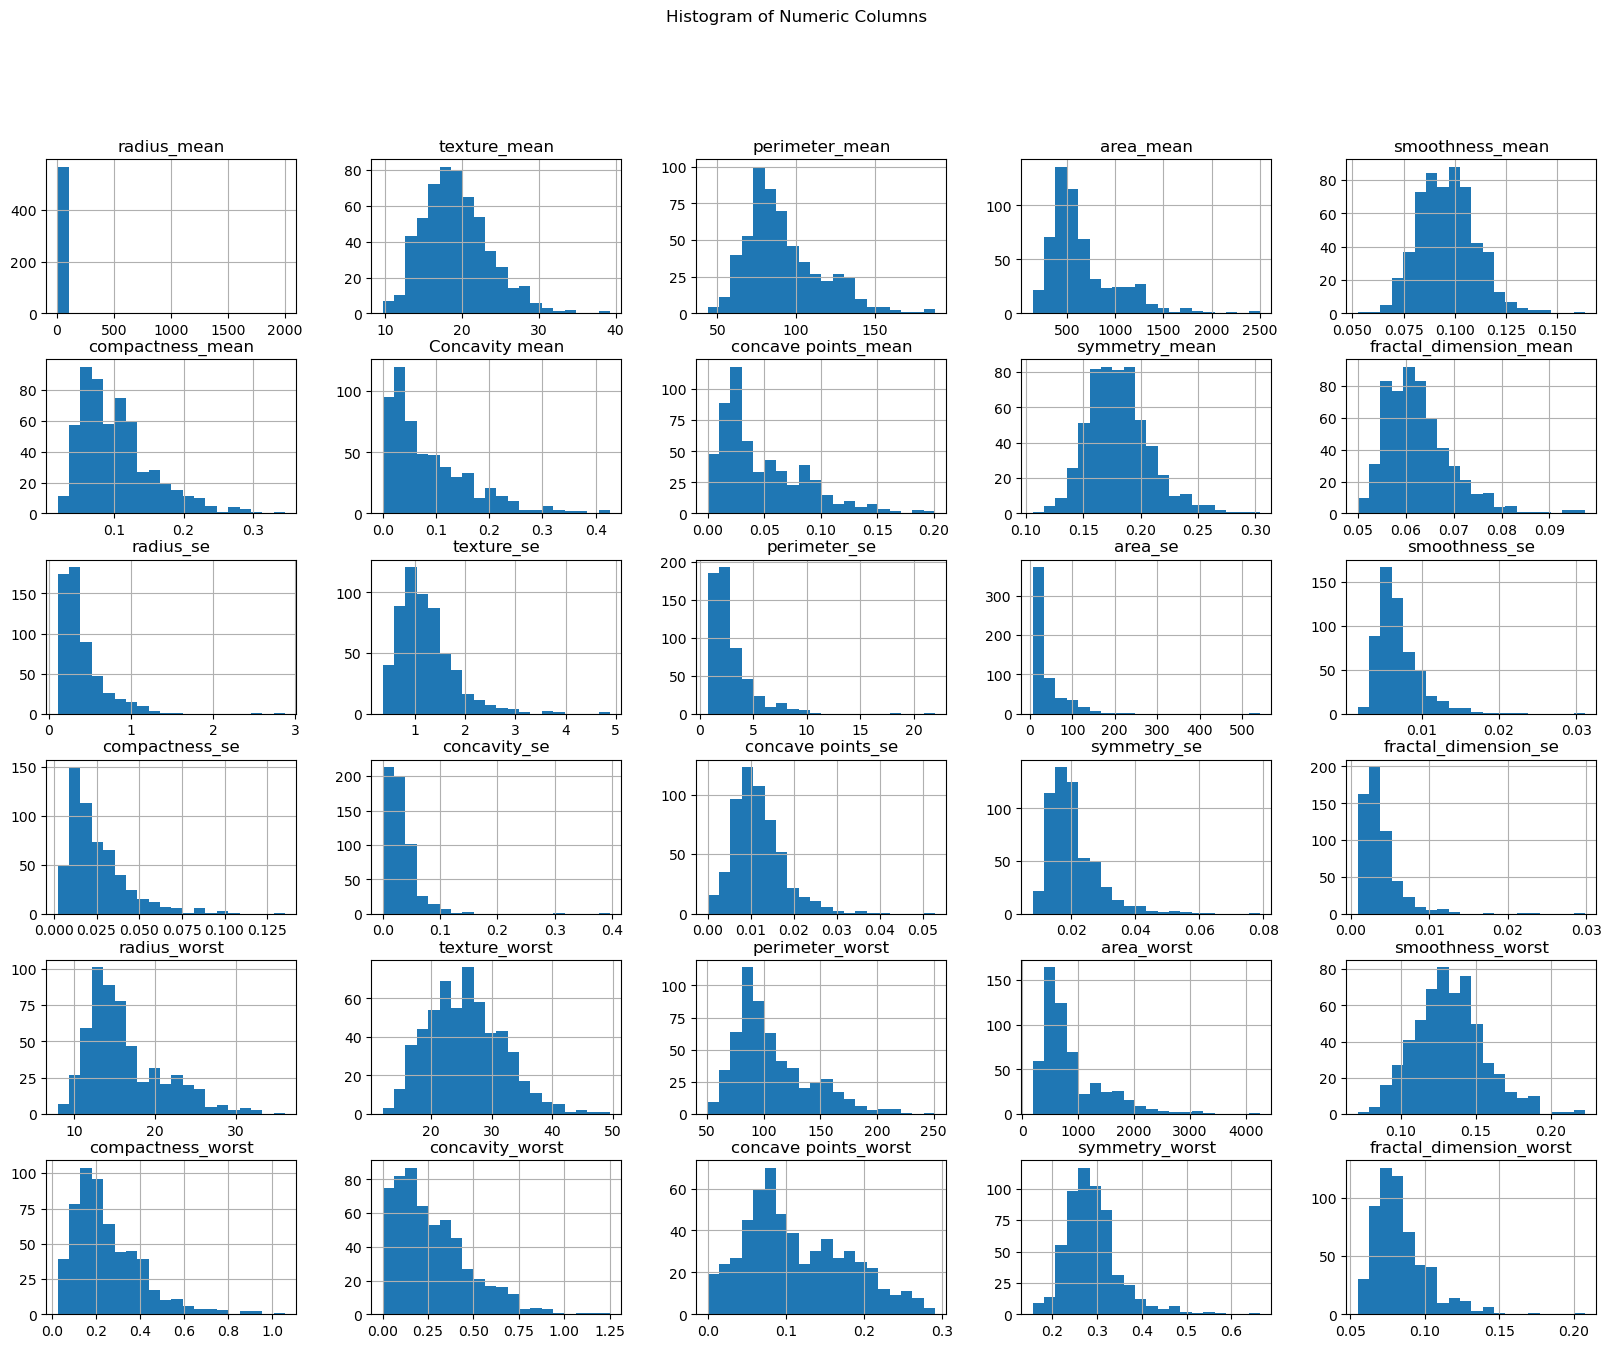

In [32]:
# 3. Data Visualization
# Distribution of a single Variable(Histogram)
columns_to_plot = df.drop(columns=['id', 'diagnosis']).columns


df[columns_to_plot].hist(bins=20, figsize=(20, 15))
plt.suptitle('Histogram of Numeric Columns')
plt.show()

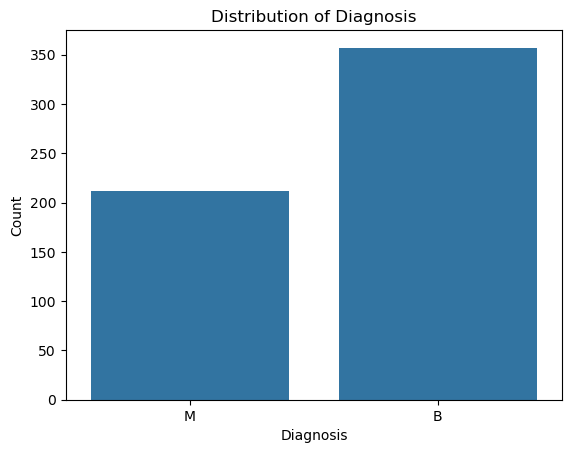

In [33]:
# Distribution of diagnosis column(M, B)
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

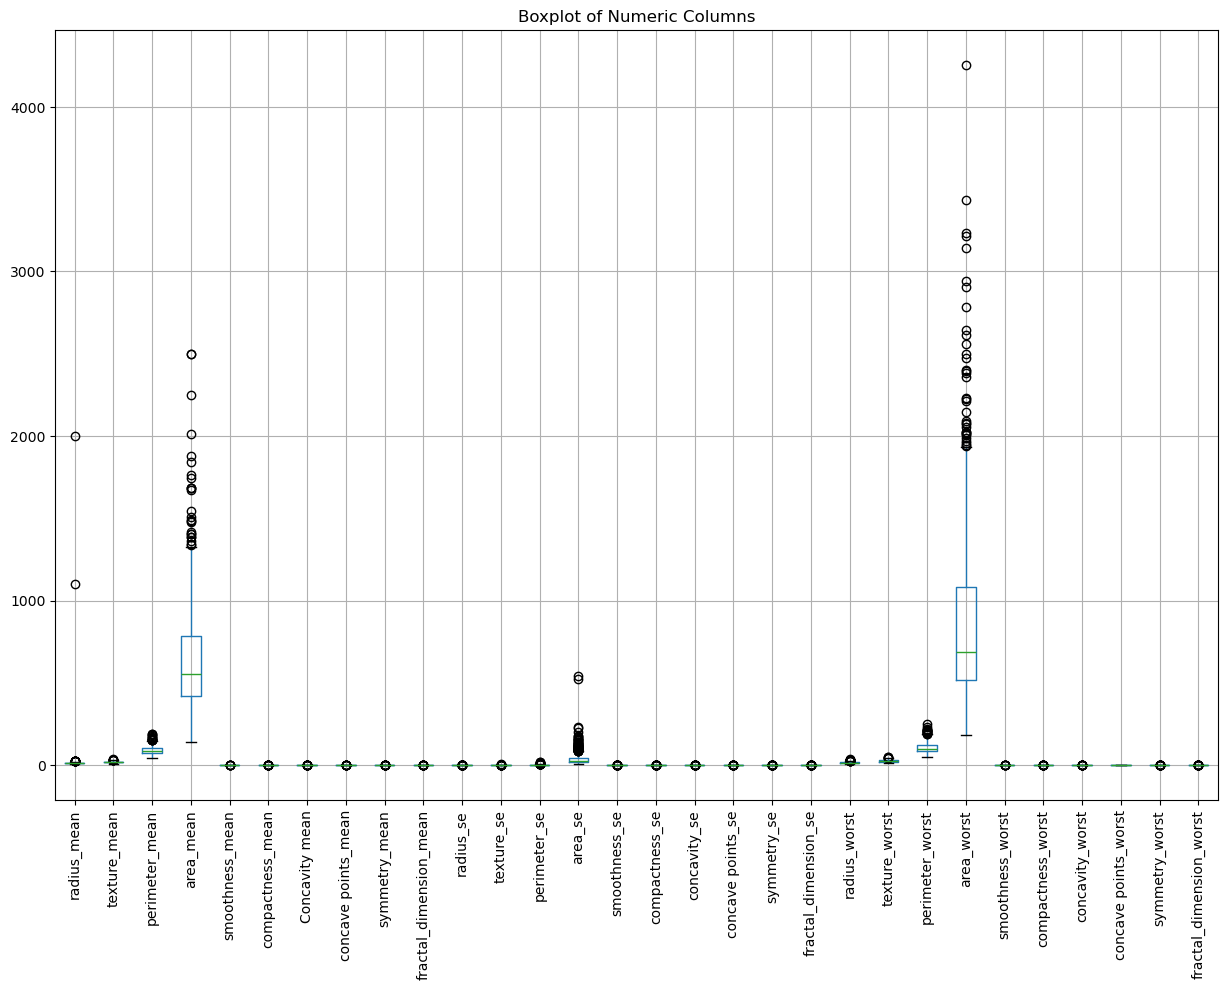

In [34]:
# Plot boxplots for all numeric columns
plt.figure(figsize=(15, 10))
df[columns_to_plot].boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot of Numeric Columns')
plt.show()


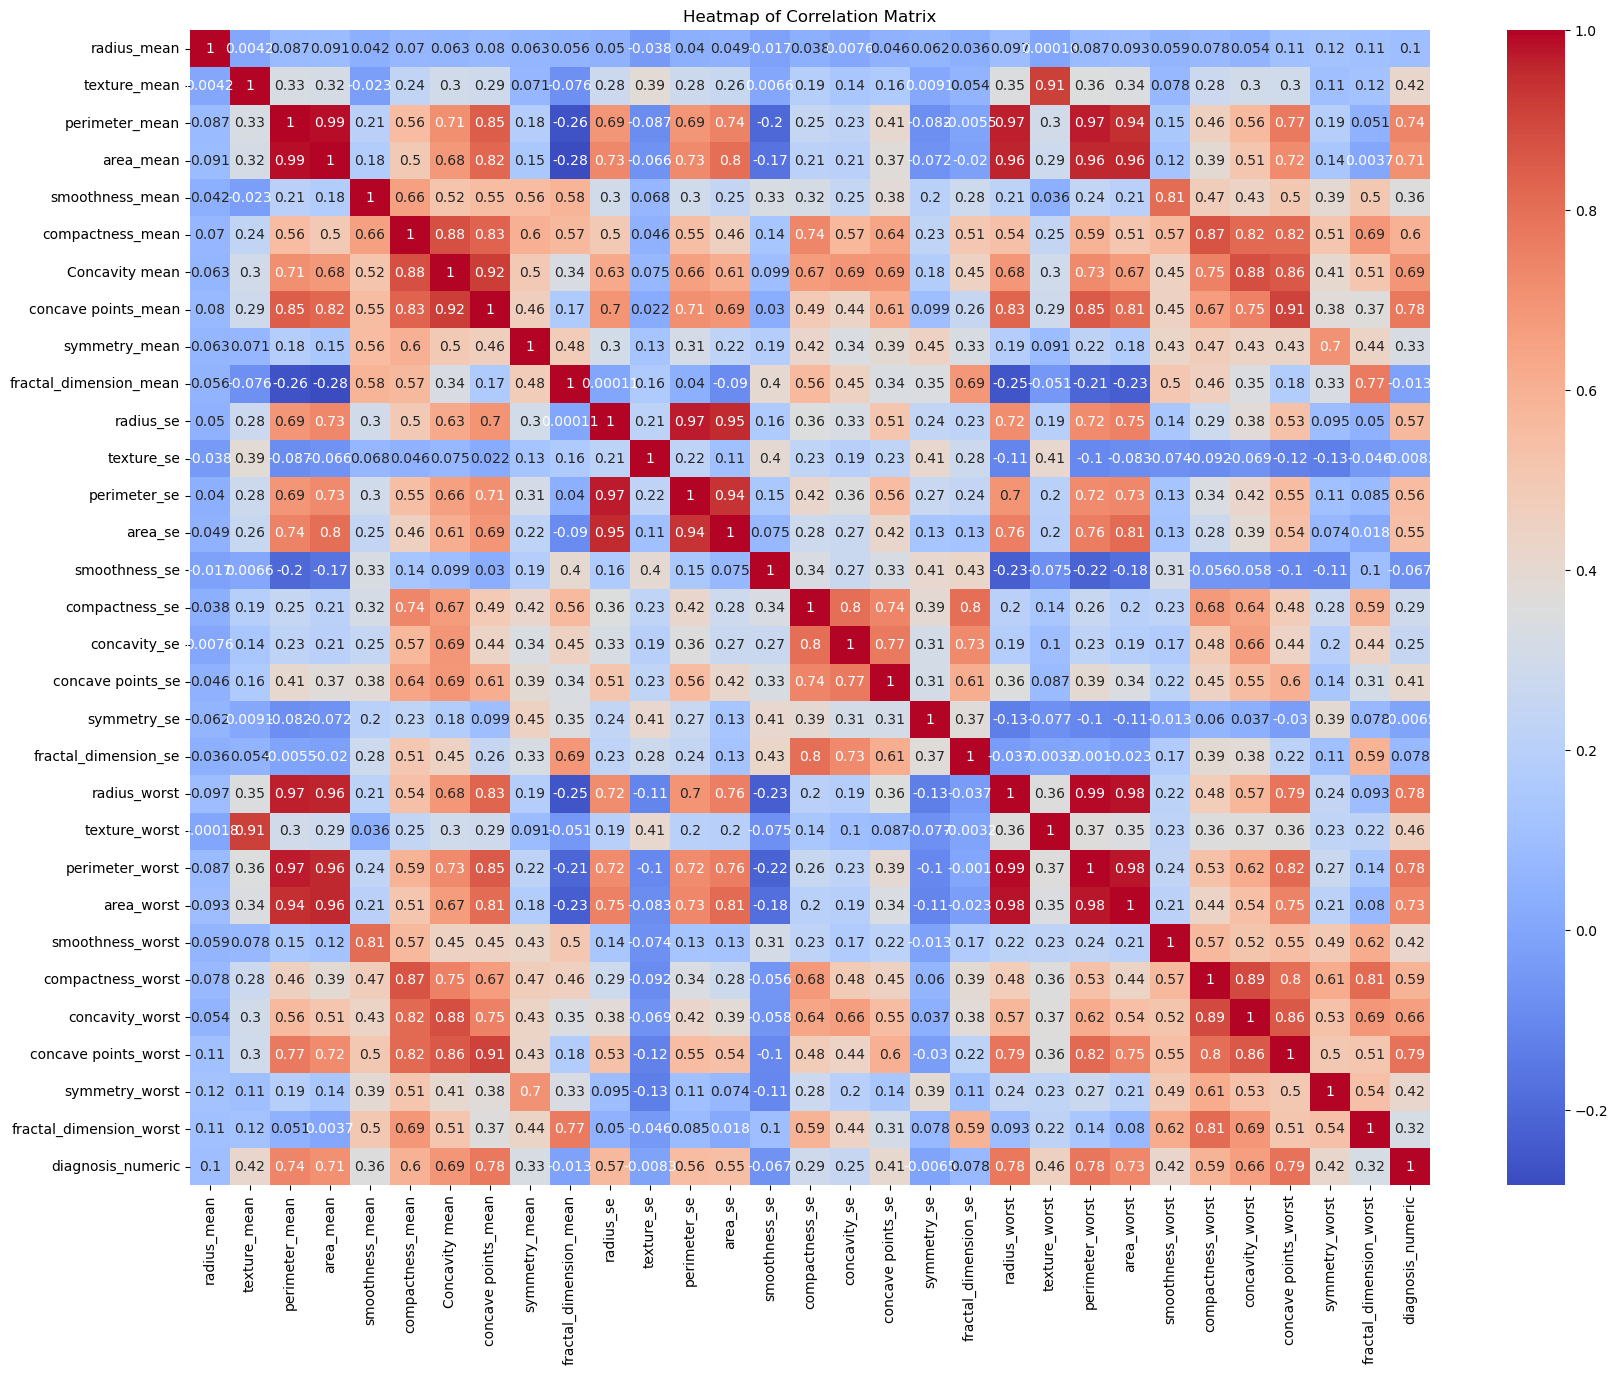

In [78]:
# Compute the correlation matrix
df['diagnosis_numeric'] = df['diagnosis'].map({'M': 1, 'B': 0})

corr_matrix = df.drop(columns=['id', 'diagnosis']).corr()


plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

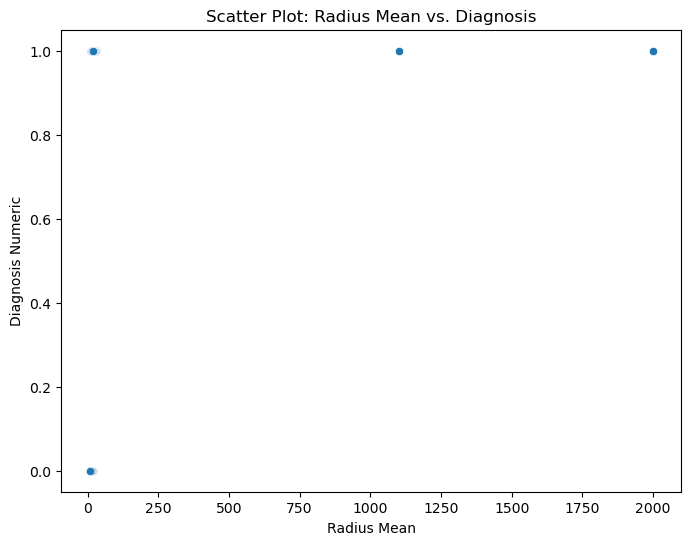

In [36]:
# Scatter plot  (examine relationships between two variables)
# Scatter plot of radius_mean vs. diagnosis_numeric
plt.figure(figsize=(8, 6))
sns.scatterplot(x='radius_mean', y='diagnosis_numeric', data=df)
plt.title('Scatter Plot: Radius Mean vs. Diagnosis')
plt.xlabel('Radius Mean')
plt.ylabel('Diagnosis Numeric')
plt.show()

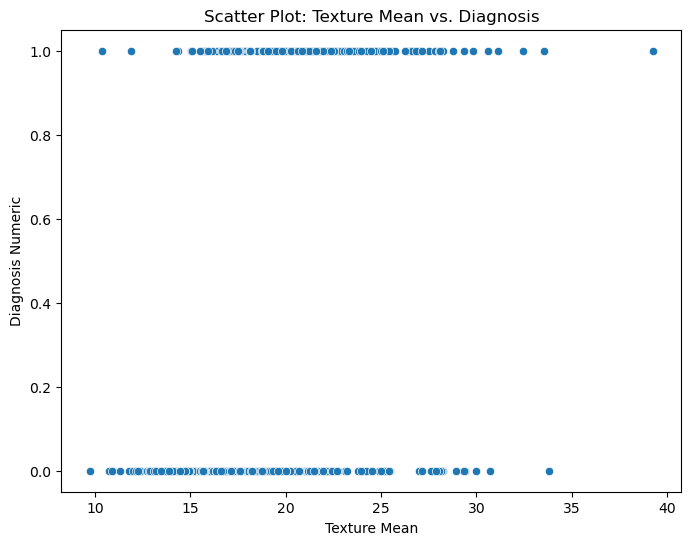

In [37]:
# Scatter plot of texture_mean vs. diagnosis_numeric
plt.figure(figsize=(8, 6))
sns.scatterplot(x='texture_mean', y='diagnosis_numeric', data=df)
plt.title('Scatter Plot: Texture Mean vs. Diagnosis')
plt.xlabel('Texture Mean')
plt.ylabel('Diagnosis Numeric')
plt.show()

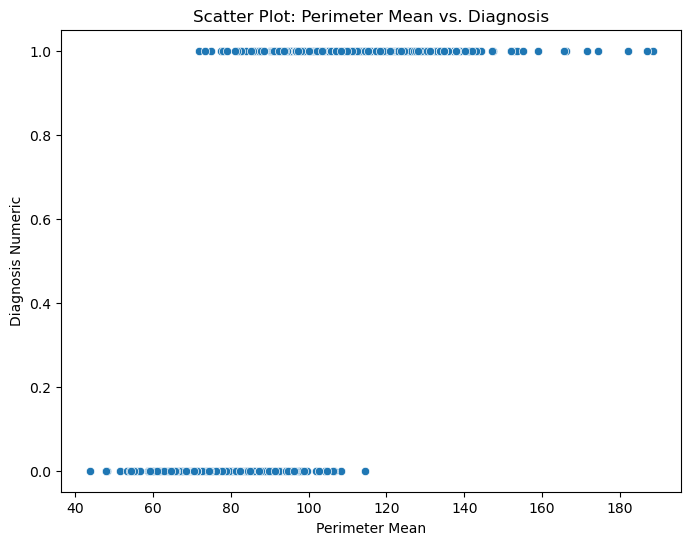

In [38]:
# Scatter plot of perimeter_mean vs. diagnosis_numeric
plt.figure(figsize=(8, 6))
sns.scatterplot(x='perimeter_mean', y='diagnosis_numeric', data=df)
plt.title('Scatter Plot: Perimeter Mean vs. Diagnosis')
plt.xlabel('Perimeter Mean')
plt.ylabel('Diagnosis Numeric')
plt.show()

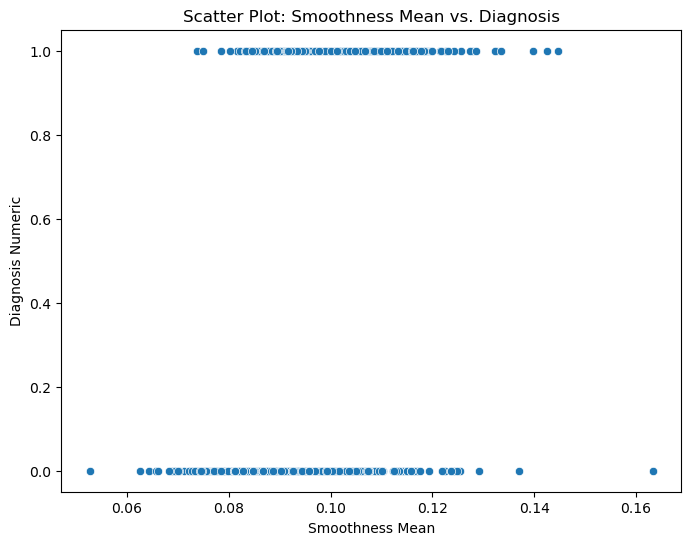

In [39]:
# Scatter plot of smoothness_mean vs. diagnosis_numeric
plt.figure(figsize=(8, 6))
sns.scatterplot(x='smoothness_mean', y='diagnosis_numeric', data=df)
plt.title('Scatter Plot: Smoothness Mean vs. Diagnosis')
plt.xlabel('Smoothness Mean')
plt.ylabel('Diagnosis Numeric')
plt.show()

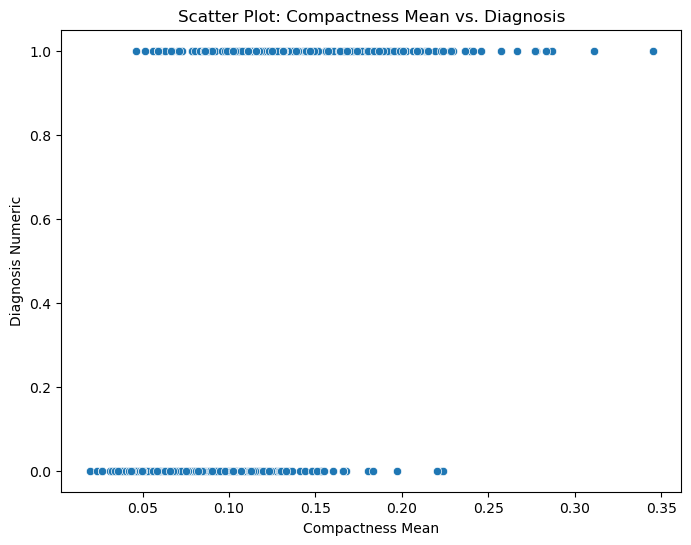

In [40]:
# Scatter plot of compactness_mean vs. diagnosis_numeric
plt.figure(figsize=(8, 6))
sns.scatterplot(x='compactness_mean', y='diagnosis_numeric', data=df)
plt.title('Scatter Plot: Compactness Mean vs. Diagnosis')
plt.xlabel('Compactness Mean')
plt.ylabel('Diagnosis Numeric')
plt.show()

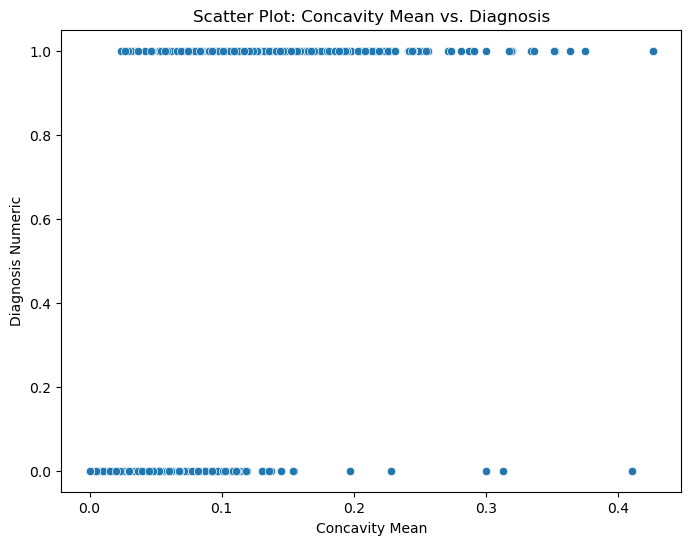

In [41]:
# Scatter plot of concavity_mean vs. diagnosis_numeric
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Concavity mean', y='diagnosis_numeric', data=df)
plt.title('Scatter Plot: Concavity Mean vs. Diagnosis')
plt.xlabel('Concavity Mean')
plt.ylabel('Diagnosis Numeric')
plt.show()

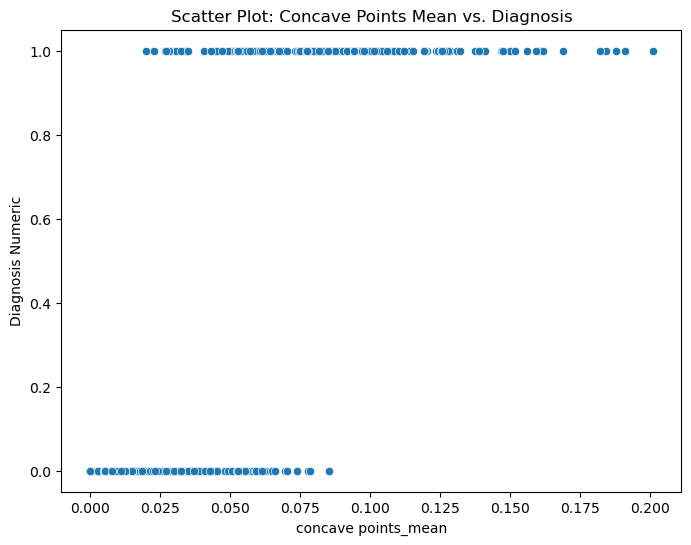

In [42]:
# Scatter plot of concave points_mean vs. diagnosis_numeric
plt.figure(figsize=(8, 6))
sns.scatterplot(x='concave points_mean', y='diagnosis_numeric', data=df)
plt.title('Scatter Plot: Concave Points Mean vs. Diagnosis')
plt.xlabel('concave points_mean')
plt.ylabel('Diagnosis Numeric')
plt.show()

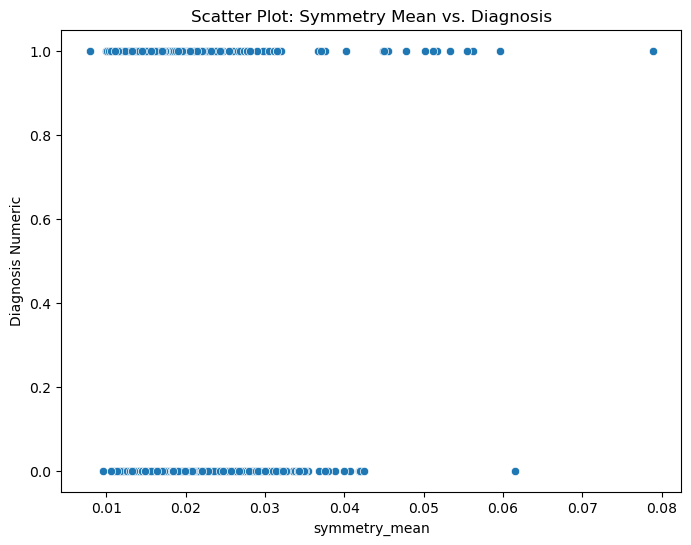

In [43]:
# Scatter plot of symmetry_mean vs. diagnosis_numeric
plt.figure(figsize=(8, 6))
sns.scatterplot(x='symmetry_se', y='diagnosis_numeric', data=df)
plt.title('Scatter Plot: Symmetry Mean vs. Diagnosis')
plt.xlabel('symmetry_mean')
plt.ylabel('Diagnosis Numeric')
plt.show()

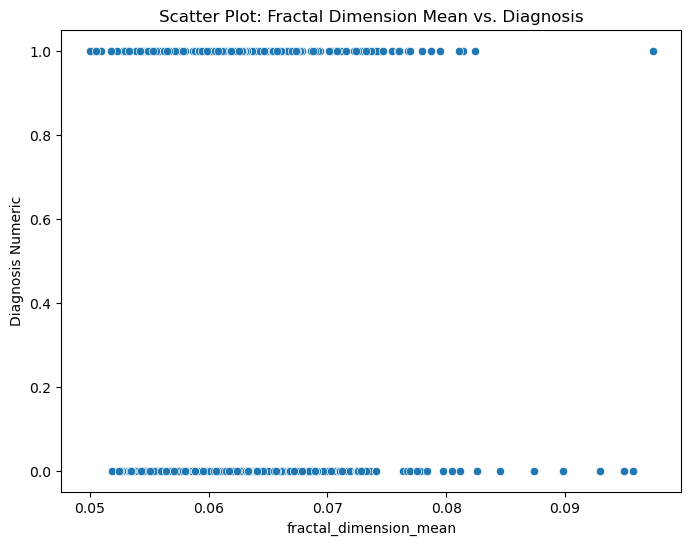

In [44]:
# Scatter plot of fractal dimension_mean vs. diagnosis_numeric
plt.figure(figsize=(8, 6))
sns.scatterplot(x='fractal_dimension_mean', y='diagnosis_numeric', data=df)
plt.title('Scatter Plot: Fractal Dimension Mean vs. Diagnosis')
plt.xlabel('fractal_dimension_mean')
plt.ylabel('Diagnosis Numeric')
plt.show()

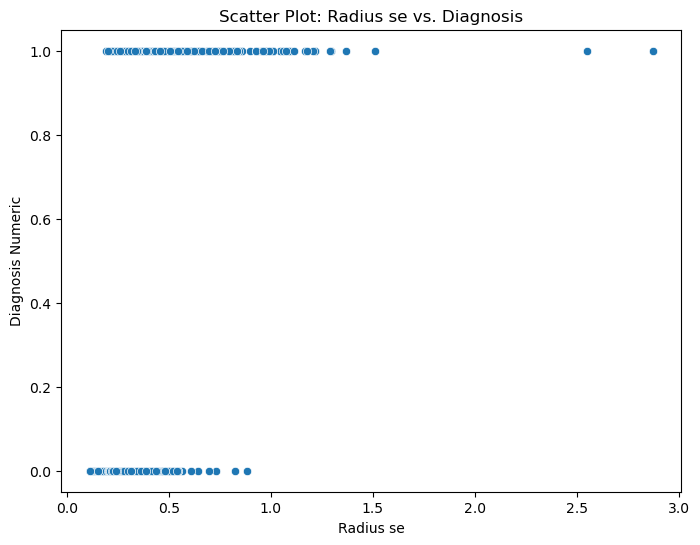

In [45]:
# Scatter plot of radius_se vs. diagnosis_numeric
plt.figure(figsize=(8, 6))
sns.scatterplot(x='radius_se', y='diagnosis_numeric', data=df)
plt.title('Scatter Plot: Radius se vs. Diagnosis')
plt.xlabel('Radius se')
plt.ylabel('Diagnosis Numeric')
plt.show()

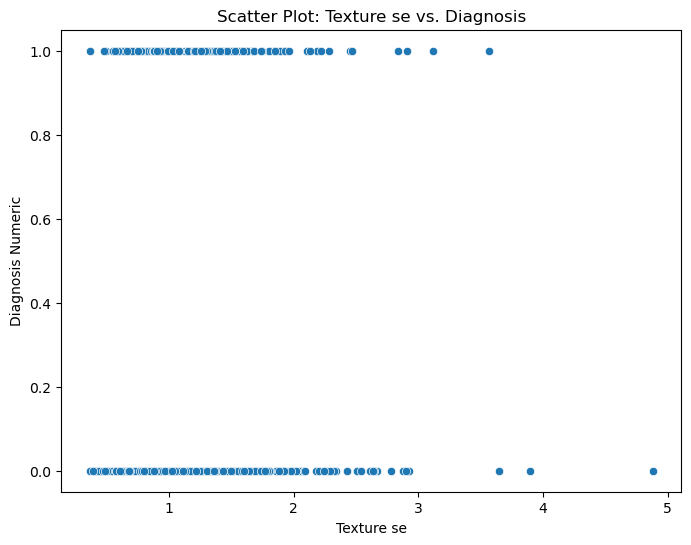

In [46]:
# Scatter plot of texture_se vs. diagnosis_numeric
plt.figure(figsize=(8, 6))
sns.scatterplot(x='texture_se', y='diagnosis_numeric', data=df)
plt.title('Scatter Plot: Texture se vs. Diagnosis')
plt.xlabel('Texture se')
plt.ylabel('Diagnosis Numeric')
plt.show()

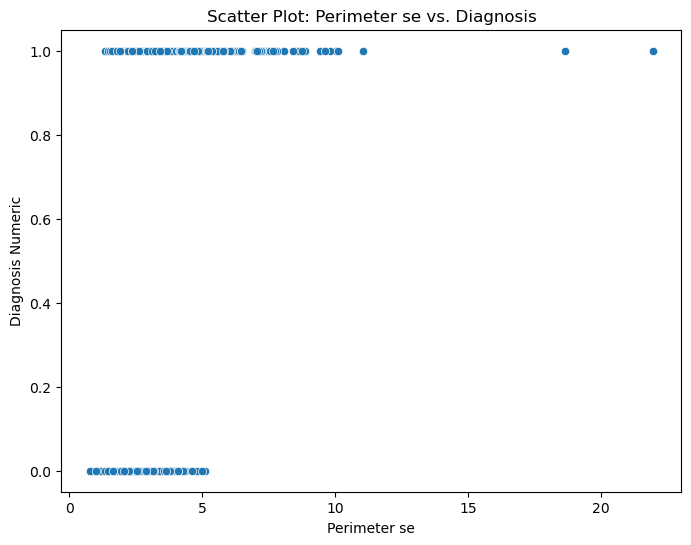

In [47]:
# Scatter plot of perimeter_se vs. diagnosis_numeric
plt.figure(figsize=(8, 6))
sns.scatterplot(x='perimeter_se', y='diagnosis_numeric', data=df)
plt.title('Scatter Plot: Perimeter se vs. Diagnosis')
plt.xlabel('Perimeter se')
plt.ylabel('Diagnosis Numeric')
plt.show()

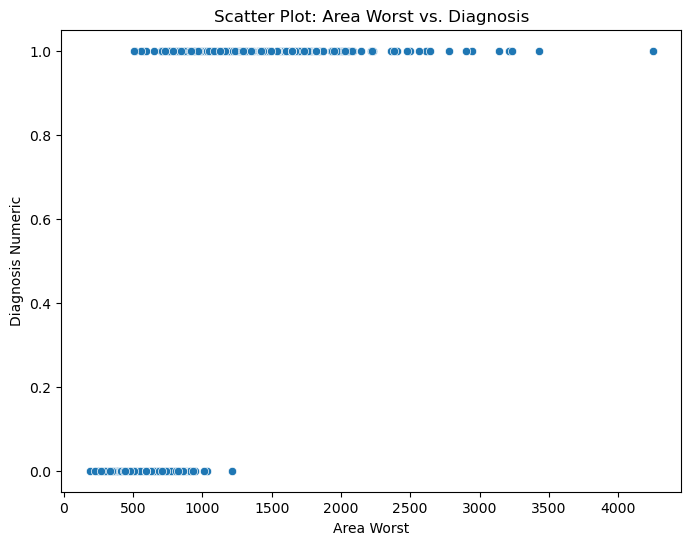

In [48]:
# Scatter plot of area_worst vs. diagnosis_numeric
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area_worst', y='diagnosis_numeric', data=df)
plt.title('Scatter Plot: Area Worst vs. Diagnosis')
plt.xlabel('Area Worst')
plt.ylabel('Diagnosis Numeric')
plt.show()

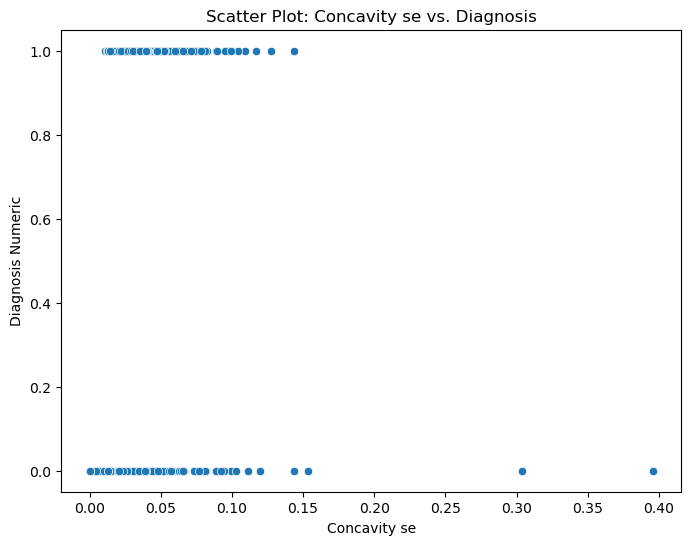

In [49]:
# Scatter plot of concavity_se vs. diagnosis_numeric
plt.figure(figsize=(8, 6))
sns.scatterplot(x='concavity_se', y='diagnosis_numeric', data=df)
plt.title('Scatter Plot: Concavity se vs. Diagnosis')
plt.xlabel('Concavity se')
plt.ylabel('Diagnosis Numeric')
plt.show()

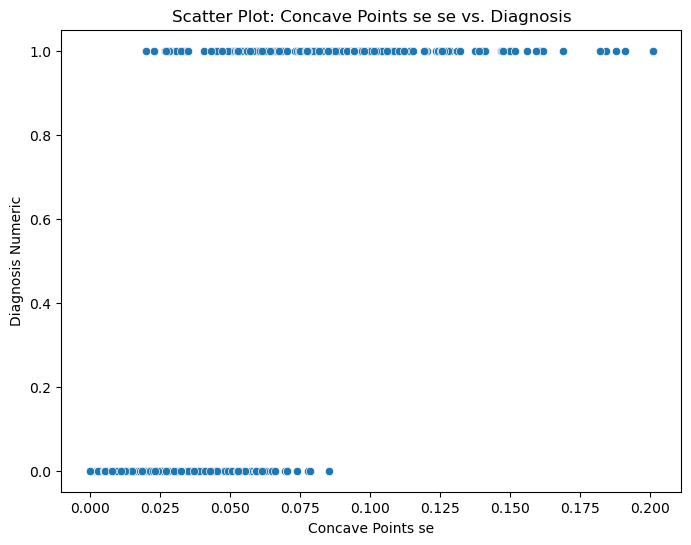

In [50]:
# concave points_se
# Scatter plot of concave points_se vs. diagnosis_numeric
plt.figure(figsize=(8, 6))
sns.scatterplot(x='concave points_mean', y='diagnosis_numeric', data=df)
plt.title('Scatter Plot: Concave Points se se vs. Diagnosis')
plt.xlabel('Concave Points se')
plt.ylabel('Diagnosis Numeric')
plt.show()

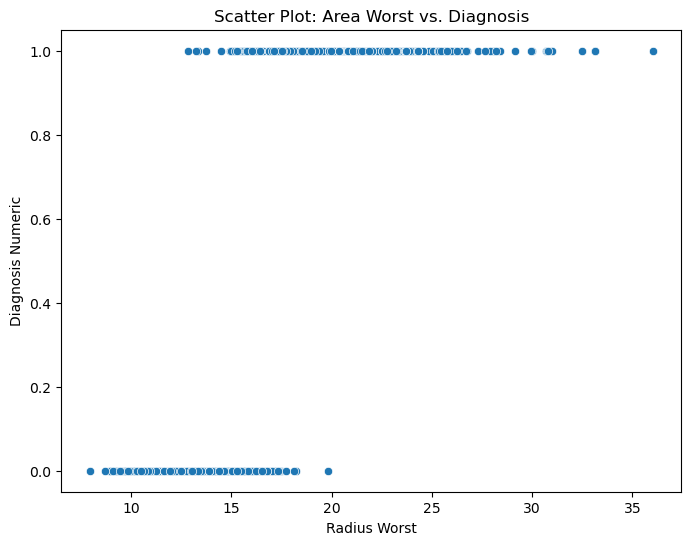

In [51]:
# Scatter plot of radius_worst vs. diagnosis_numeric
plt.figure(figsize=(8, 6))
sns.scatterplot(x='radius_worst', y='diagnosis_numeric', data=df)
plt.title('Scatter Plot: Area Worst vs. Diagnosis')
plt.xlabel('Radius Worst')
plt.ylabel('Diagnosis Numeric')
plt.show()

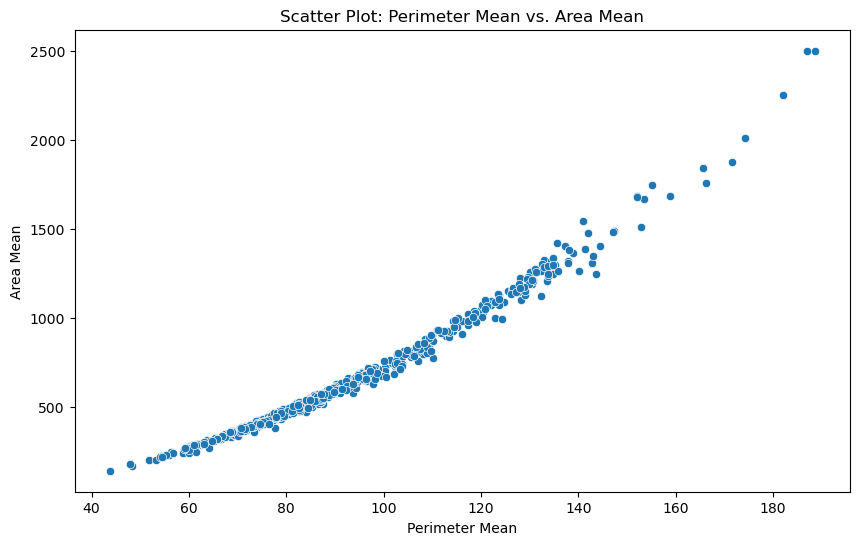

In [52]:
# Scatter Plot for positive correlating features
# Scatter plot of perimeter_mean vs. area_mean
plt.figure(figsize=(10, 6))
sns.scatterplot(x='perimeter_mean', y='area_mean', data=df)
plt.title('Scatter Plot: Perimeter Mean vs. Area Mean')
plt.xlabel('Perimeter Mean')
plt.ylabel('Area Mean')
plt.show()

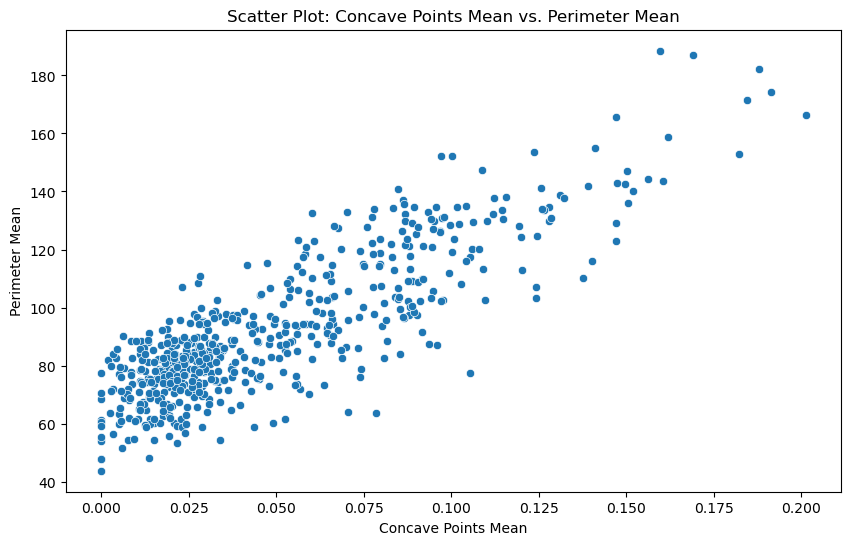

In [53]:
# Scatter plot of concave points_mean vs. radius_mean
plt.figure(figsize=(10, 6))
sns.scatterplot(x='concave points_mean', y='perimeter_mean', data=df)
plt.title('Scatter Plot: Concave Points Mean vs. Perimeter Mean')
plt.xlabel('Concave Points Mean')
plt.ylabel('Perimeter Mean')
plt.show()

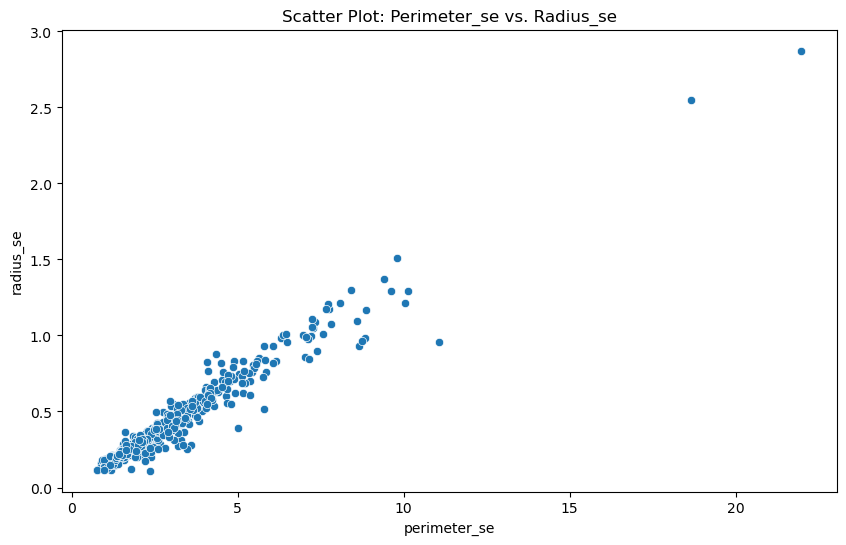

In [54]:
# Scatter plot of perimeter_se vs. radius_se
plt.figure(figsize=(10, 6))
sns.scatterplot(x='perimeter_se', y='radius_se', data=df)
plt.title('Scatter Plot: Perimeter_se vs. Radius_se')
plt.xlabel('perimeter_se')
plt.ylabel('radius_se')
plt.show()

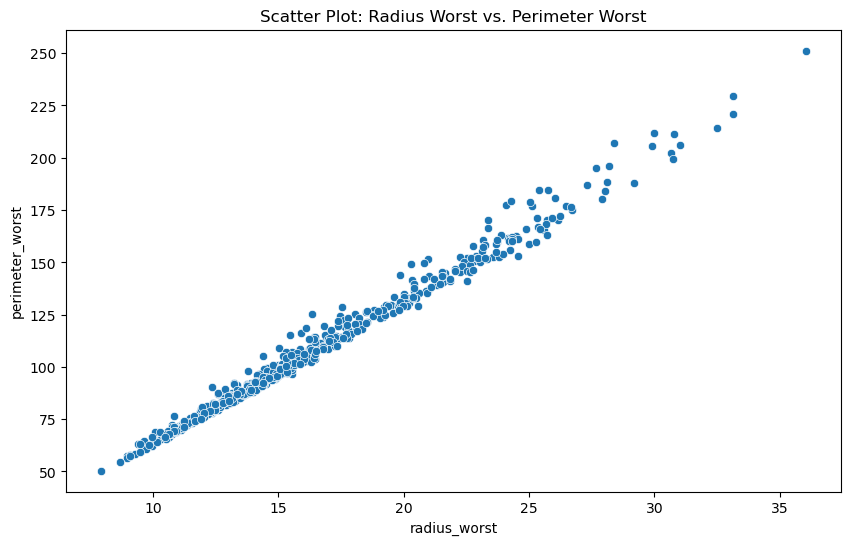

In [55]:
# Scatter plot of radius_worst vs. perimeter_worst
plt.figure(figsize=(10, 6))
sns.scatterplot(x='radius_worst', y='perimeter_worst', data=df)
plt.title('Scatter Plot: Radius Worst vs. Perimeter Worst')
plt.xlabel('radius_worst')
plt.ylabel('perimeter_worst')
plt.show()

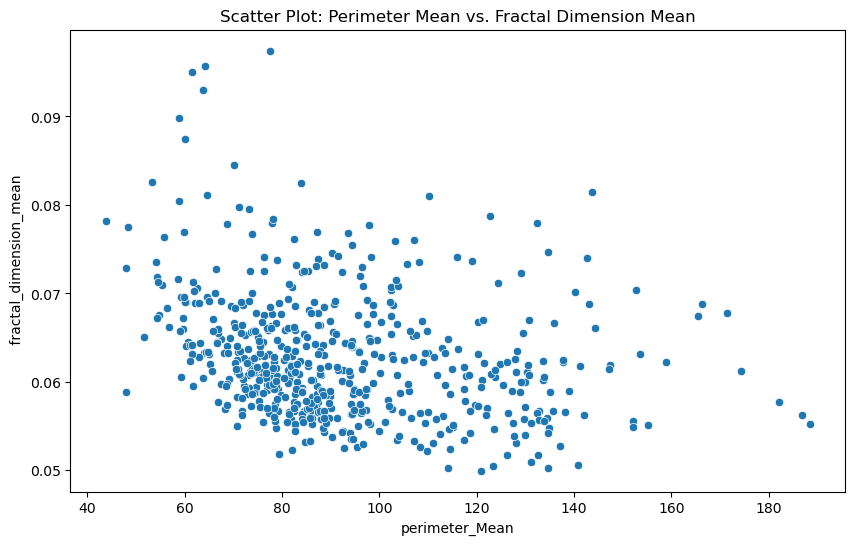

In [56]:
# Scatter Plot for negative correlant features
# Scatter plot of perimeter_mean vs. fractal_dimension_mean
plt.figure(figsize=(10, 6))
sns.scatterplot(x='perimeter_mean', y='fractal_dimension_mean', data=df)
plt.title('Scatter Plot: Perimeter Mean vs. Fractal Dimension Mean')
plt.xlabel('perimeter_Mean')
plt.ylabel(' fractal_dimension_mean')
plt.show()

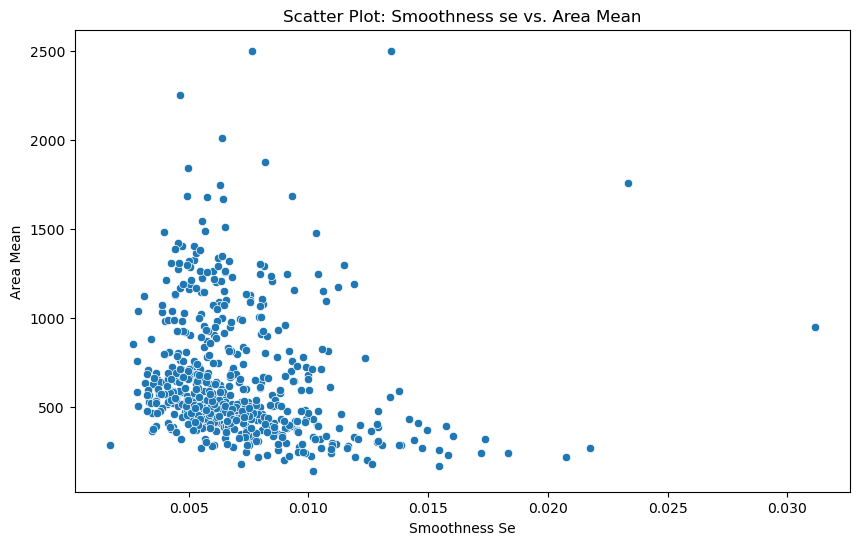

In [57]:
# Scatter plot of smoothness_se vs. area_mean
plt.figure(figsize=(10, 6))
sns.scatterplot(x='smoothness_se', y='area_mean', data=df)
plt.title('Scatter Plot: Smoothness se vs. Area Mean')
plt.xlabel('Smoothness Se')
plt.ylabel('Area Mean')
plt.show()

In [58]:
## Feature Engineering
# Feature Selection
# Step 1: ANOVA Test
"""
ANOVA helps us compare the means of the numeric features to understand their significance in relation to 
the target variable.
"""

X = df.drop(['id', 'diagnosis', 'diagnosis_numeric'], axis=1)  # Drop non-numeric columns
y = df['diagnosis_numeric']

anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_selector.fit(X, y)


anova_scores = pd.DataFrame({'Feature': X.columns, 'Score': anova_selector.scores_})
print(anova_scores)


                    Feature       Score
0               radius_mean    5.833965
1              texture_mean  118.096059
2            perimeter_mean  697.235272
3                 area_mean  573.060747
4           smoothness_mean   83.651123
5          compactness_mean  313.233079
6            Concavity mean  523.461712
7       concave points_mean  859.478422
8             symmetry_mean   69.527444
9    fractal_dimension_mean    0.093459
10                radius_se  268.840327
11               texture_se    0.039095
12             perimeter_se  253.897392
13                  area_se  243.651586
14            smoothness_se    2.557968
15           compactness_se   53.247339
16             concavity_se   39.014482
17        concave points_se  113.262760
18              symmetry_se    0.024117
19     fractal_dimension_se    3.468275
20             radius_worst  860.781707
21            texture_worst  149.596905
22          perimeter_worst  897.944219
23               area_worst  661.600206


In [59]:
# Step 2: Wrapper Method : Recursive Feature Elimination (RFE)
"""
RFE works by recursively removing the least important features and building a model on the remaining features.

It uses the model accuracy to identify which features (and how many of them) contribute the most to predicting 
the target variable.
"""
# Initialize the model
model = LogisticRegression(max_iter=10000)

# Initialize RFE
rfe = RFE(model, n_features_to_select=15)
rfe.fit(X, y)

# Print selected features
rfe_selected_features = pd.DataFrame({'Feature': X.columns, 'Selected': rfe.support_})
print(rfe_selected_features)

                    Feature  Selected
0               radius_mean     False
1              texture_mean      True
2            perimeter_mean     False
3                 area_mean     False
4           smoothness_mean      True
5          compactness_mean      True
6            Concavity mean      True
7       concave points_mean      True
8             symmetry_mean      True
9    fractal_dimension_mean     False
10                radius_se     False
11               texture_se      True
12             perimeter_se      True
13                  area_se     False
14            smoothness_se     False
15           compactness_se     False
16             concavity_se     False
17        concave points_se     False
18              symmetry_se     False
19     fractal_dimension_se     False
20             radius_worst     False
21            texture_worst      True
22          perimeter_worst     False
23               area_worst     False
24         smoothness_worst      True
25        co

In [60]:
# Step 3: Embedded Method : Lasso Regression
# performing feature selection.

# Initialize Lasso model
lasso = Lasso(alpha=0.01)  # Adjust alpha as needed
lasso.fit(X, y)

# Use SelectFromModel to get important features
model = SelectFromModel(lasso, prefit=True)
lasso_selected_features = pd.DataFrame({'Feature': X.columns, 'Selected': model.get_support()})
print(lasso_selected_features)


                    Feature  Selected
0               radius_mean      True
1              texture_mean      True
2            perimeter_mean     False
3                 area_mean      True
4           smoothness_mean     False
5          compactness_mean     False
6            Concavity mean     False
7       concave points_mean     False
8             symmetry_mean     False
9    fractal_dimension_mean     False
10                radius_se     False
11               texture_se     False
12             perimeter_se     False
13                  area_se      True
14            smoothness_se     False
15           compactness_se     False
16             concavity_se     False
17        concave points_se     False
18              symmetry_se     False
19     fractal_dimension_se     False
20             radius_worst      True
21            texture_worst      True
22          perimeter_worst      True
23               area_worst      True
24         smoothness_worst     False
25        co

In [61]:
# Feature Engineering
# Reducing skewness in data
"""
Apply the log transformation to all numerical features in your dataset to reduce skewness.
Remove outliers based on the IQR method.
"""
# List of selected features from your feature selection methods
selected_features = [
    'concave points_worst', 'perimeter_worst', 'area_mean', 'Concavity mean',
    'concave points_mean', 'radius_worst', 'area_worst', 'compactness_mean',
    'concavity_worst', 'compactness_worst', 'perimeter_se', 'area_se',
    'texture_mean', 'texture_worst'
]

# Ensure these features are in the DataFrame
selected_features = [feature for feature in selected_features if feature in df.columns]

# Adjusted log transformation to handle non-positive values
df_log_transformed = df.copy()
for feature in selected_features:
    if (df_log_transformed[feature] > 0).all():
        df_log_transformed[feature] = np.log1p(df_log_transformed[feature])
    else:
        # Adding a small constant to handle non-positive values
        df_log_transformed[feature] = np.log1p(df_log_transformed[feature] + 1e-8) # small constant to the data to ensure all values are positive

# IQR Method to remove outliers
def remove_outliers_iqr(df, columns, multiplier=1.5):
    df_out = df.copy()
    for col in columns:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]
    return df_out

df_cleaned = remove_outliers_iqr(df_log_transformed, selected_features)

# Verify the transformation and outlier removal
print(f"Original dataset shape: {df.shape}")
print(f"Log-transformed and outlier-removed dataset shape: {df_cleaned.shape}")

Original dataset shape: (569, 33)
Log-transformed and outlier-removed dataset shape: (507, 33)


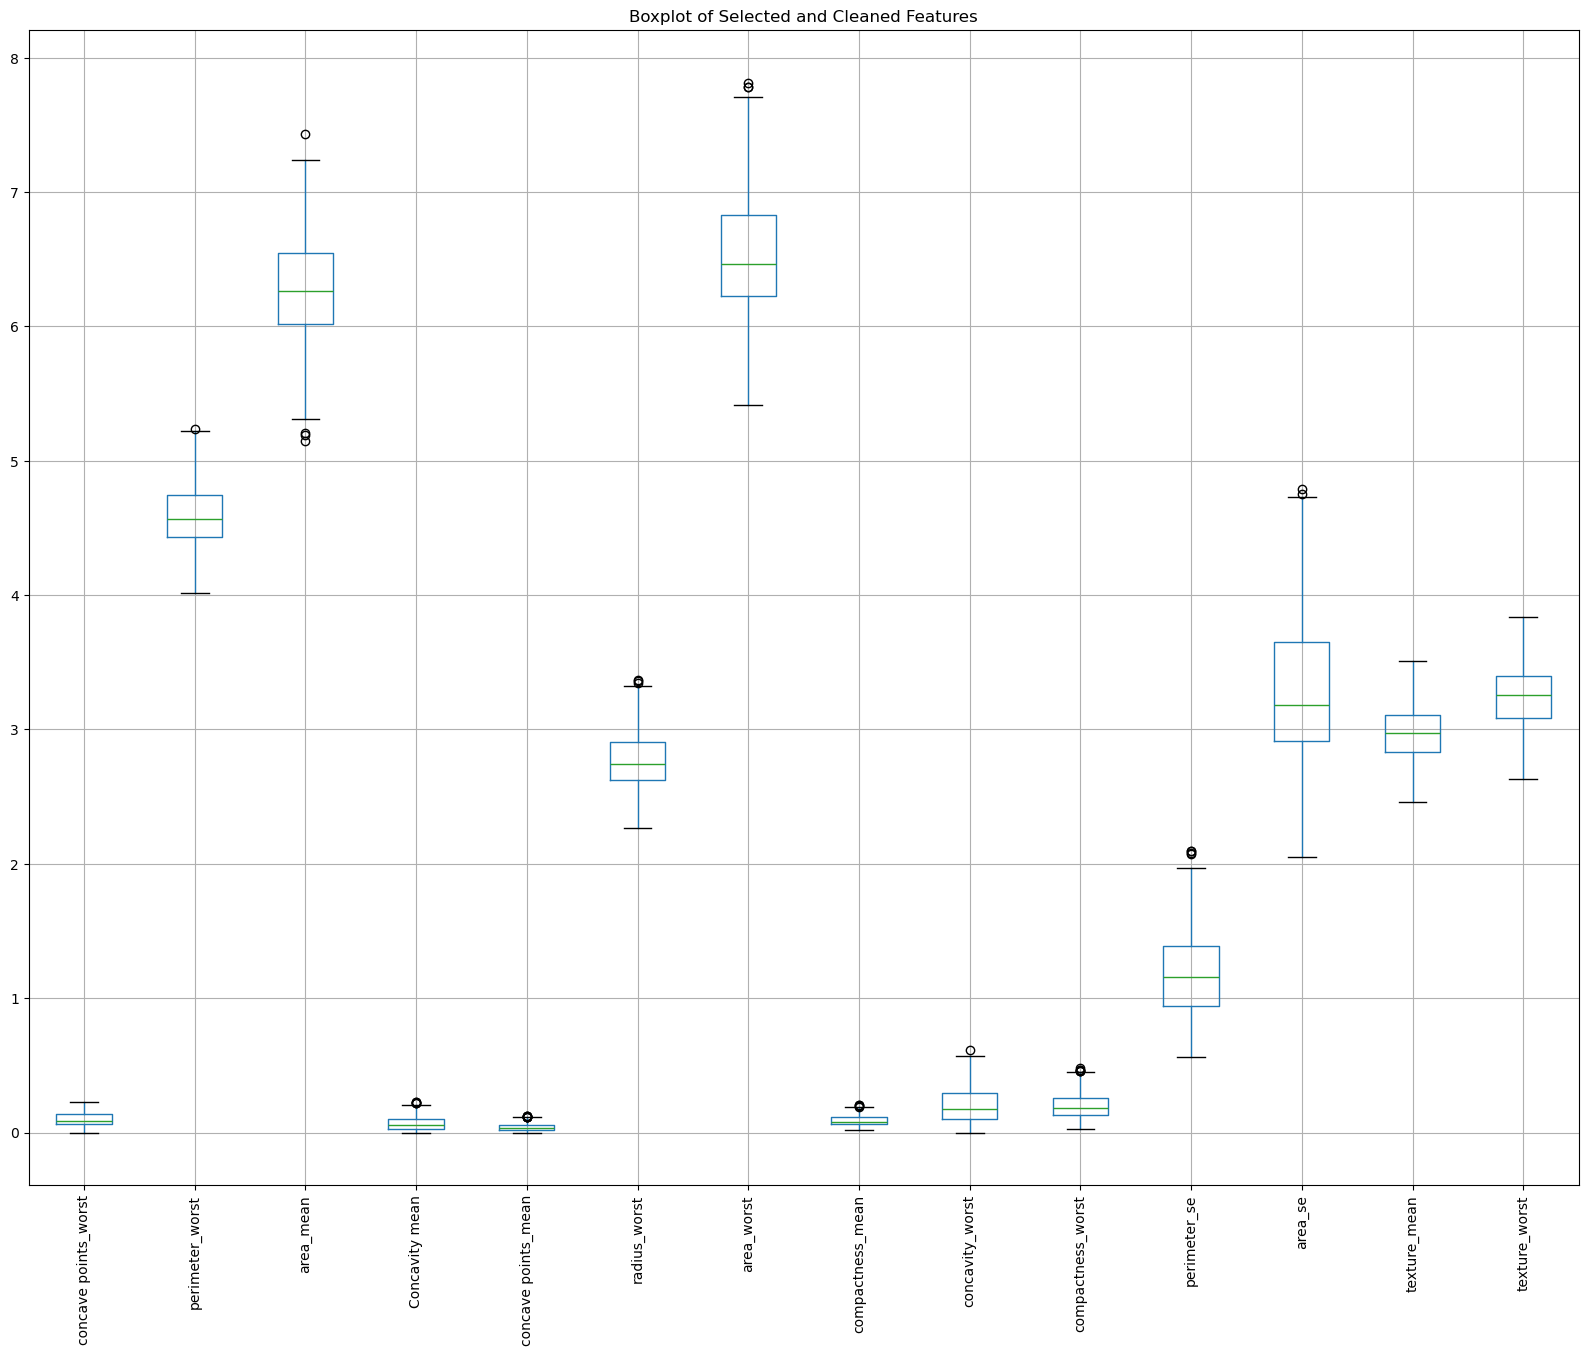

In [62]:
df_cleaned = remove_outliers_iqr(df_log_transformed, selected_features)

# Plot boxplots for selected features
plt.figure(figsize=(20, 15))
df_cleaned[selected_features].boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot of Selected and Cleaned Features')
plt.show()


In [63]:
shape_statistics = {}

for column in selected_features:
    if column in df_cleaned.columns:
        shape_statistics[column] = {
            'skewness': skew(df_cleaned[column].dropna()),  
            'kurtosis': kurtosis(df_cleaned[column].dropna(), fisher=True)  # Fisher=True gives normal kurtosis (excess kurtosis)
        }

# Convert to DataFrame for better readability
shape_df = pd.DataFrame(shape_statistics).T  # Transpose to match the desired format

# Display the skewness and kurtosis
print(shape_df)

                      skewness  kurtosis
concave points_worst  0.354858 -0.584775
perimeter_worst       0.346364 -0.422619
area_mean             0.163678 -0.269082
Concavity mean        0.883194 -0.024955
concave points_mean   0.882946 -0.095781
radius_worst          0.410834 -0.347686
area_worst            0.363834 -0.352741
compactness_mean      0.626036 -0.102638
concavity_worst       0.526288 -0.351479
compactness_worst     0.629641 -0.144325
perimeter_se          0.525365 -0.294489
area_se               0.594437 -0.224068
texture_mean          0.047625 -0.291719
texture_worst        -0.082800 -0.551321


In [64]:
## Feature scaling and normalization 
"""
Feature scaling and normalization are essential steps in preparing data for machine learning models. 
They ensure that features contribute equally to the model, prevent certain features from dominating due 
to their scale, and help models converge faster.

"""
# features and target variable
X = df_cleaned[selected_features]
y = df_cleaned['diagnosis_numeric'] 

# Standardization
standard_scaler = StandardScaler()
X_standardized = standard_scaler.fit_transform(X)

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
X_min_max_scaled = min_max_scaler.fit_transform(X)

# Create DataFrames for standardized and min-max scaled features
df_standardized = pd.DataFrame(X_standardized, columns=selected_features)
df_min_max_scaled = pd.DataFrame(X_min_max_scaled, columns=selected_features)

# Add target variable back to the scaled DataFrames if needed
df_standardized['diagnosis_numeric'] = y.values
df_min_max_scaled['diagnosis_numeric'] = y.values

print("Standardized DataFrame shape:", df_standardized.shape)
print("Min-Max Scaled DataFrame shape:", df_min_max_scaled.shape)


Standardized DataFrame shape: (507, 15)
Min-Max Scaled DataFrame shape: (507, 15)


In [65]:
# Standardized Features
print("First few rows of standardized features:")
print(df_standardized.head())

First few rows of standardized features:
   concave points_worst  perimeter_worst  area_mean  Concavity mean  \
0              1.442349         1.896366   2.065652        0.295723   
1              2.364325         1.735815   1.839233        2.145865   
2              1.049266         1.728006   2.014219        2.155437   
3              1.244282         0.197174  -0.310590        1.503229   
4              1.561225         1.753976   1.500629        0.744007   

   concave points_mean  radius_worst  area_worst  compactness_mean  \
0             0.963846      2.104150    2.122685         -0.369478   
1             2.799846      1.858152    1.846712          1.626664   
2             2.060908      1.670651    1.679795          0.976937   
3             1.312150      0.106897    0.140608          1.864938   
4             1.088685      1.733437    1.719639          0.393378   

   concavity_worst  compactness_worst  perimeter_se   area_se  texture_mean  \
0         0.105193          -0.3

In [66]:
# Calculate mean and standard deviation of the standardized features
mean_std_stats = pd.DataFrame({
    'Mean': df_standardized.mean(),
    'Standard Deviation': df_standardized.std()
})

# Display the mean and standard deviation
print("Mean and Standard Deviation of Standardized Features:")
print(mean_std_stats)

Mean and Standard Deviation of Standardized Features:
                              Mean  Standard Deviation
concave points_worst -5.605860e-17            1.000988
perimeter_worst      -5.045274e-16            1.000988
area_mean             1.121172e-16            1.000988
Concavity mean        2.522637e-16            1.000988
concave points_mean   2.802930e-17            1.000988
radius_worst          8.548936e-16            1.000988
area_worst           -2.242344e-16            1.000988
compactness_mean      1.611685e-16            1.000988
concavity_worst      -1.821904e-16            1.000988
compactness_worst    -1.401465e-16            1.000988
perimeter_se         -5.185420e-16            1.000988
area_se               5.886153e-16            1.000988
texture_mean          1.774605e-15            1.000988
texture_worst         1.527597e-15            1.000988
diagnosis_numeric     3.096647e-01            0.462812


In [67]:
# Normalized Features
print("First few rows of min-max scaled features:")
print(df_min_max_scaled.head())

First few rows of min-max scaled features:
   concave points_worst  perimeter_worst  area_mean  Concavity mean  \
0              0.752882         0.867571   0.895032        0.367516   
1              0.960059         0.834579   0.852494        0.794544   
2              0.664553         0.832974   0.885369        0.796753   
3              0.708375         0.518405   0.448601        0.646218   
4              0.779595         0.838311   0.788880        0.470984   

   concave points_mean  radius_worst  area_worst  compactness_mean  \
0             0.546199      0.899863    0.901687          0.302954   
1             0.969354      0.848682    0.845491          0.692369   
2             0.799046      0.809672    0.811502          0.565618   
3             0.626475      0.484325    0.498081          0.738852   
4             0.574972      0.822735    0.819615          0.451775   

   concavity_worst  compactness_worst  perimeter_se   area_se  texture_mean  \
0         0.352106           0

In [68]:
## Data splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
# Standardization
standard_scaler = StandardScaler()
X_train_standardized = standard_scaler.fit_transform(X_train)
X_test_standardized = standard_scaler.transform(X_test)

# models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

results = {'Model': [], 'Accuracy': [], 'Classification Report': [], 'Confusion Matrix': []}

# Function to evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    return accuracy, report, confusion


# Evaluate each model using Standardized data
print("\nEvaluating models on Standardized data:")
for name, model in models.items():
    accuracy, report, confusion = evaluate_model(model, X_train_standardized, X_test_standardized, y_train, y_test)
    results['Model'].append(f'{name} (Standardized)')
    results['Accuracy'].append(accuracy)
    results['Classification Report'].append(report)
    results['Confusion Matrix'].append(confusion)

# Print results
for i in range(len(results['Model'])):
    print(f"\nModel: {results['Model'][i]}")
    print(f"Accuracy: {results['Accuracy'][i]}")
    print(f"Classification Report:\n{results['Classification Report'][i]}")
    print(f"Confusion Matrix:\n{results['Confusion Matrix'][i]}")




Evaluating models on Standardized data:

Model: Logistic Regression (Standardized)
Accuracy: 0.9738562091503268
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       104
           1       0.98      0.94      0.96        49

    accuracy                           0.97       153
   macro avg       0.98      0.96      0.97       153
weighted avg       0.97      0.97      0.97       153

Confusion Matrix:
[[103   1]
 [  3  46]]

Model: K-Nearest Neighbors (Standardized)
Accuracy: 0.934640522875817
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       104
           1       0.93      0.86      0.89        49

    accuracy                           0.93       153
   macro avg       0.93      0.91      0.92       153
weighted avg       0.93      0.93      0.93       153

Confusion Matrix:
[[101   3]
 [  7  42]]

Model: Support Vector Machine (St

In [69]:
## Cross Validation
"""
Cross-validation is a crucial step in evaluating the performance of a model to ensure that it generalizes well to unseen data.
Cross-validation is a technique for assessing how the results of a statistical analysis will generalize to an independent dataset. 
It is primarily used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform 
in practice. One of the most common methods of cross-validation is k-fold cross-validation.

# Steps:
1. Split the dataset into k equally sized subsets (folds).
2. Train the model on k-1 folds and test it on the remaining fold.
3. Repeat this process k times, each time with a different fold as the test set.
4. Aggregate the results to get an overall performance metric.
"""

'\nCross-validation is a crucial step in evaluating the performance of a model to ensure that it generalizes well to unseen data.\nCross-validation is a technique for assessing how the results of a statistical analysis will generalize to an independent dataset. \nIt is primarily used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform \nin practice. One of the most common methods of cross-validation is k-fold cross-validation.\n\n# Steps:\n1. Split the dataset into k equally sized subsets (folds).\n2. Train the model on k-1 folds and test it on the remaining fold.\n3. Repeat this process k times, each time with a different fold as the test set.\n4. Aggregate the results to get an overall performance metric.\n'

In [70]:
# Initialize k-fold cross-validation

kf = KFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_models(X, y, models, kf):
    results = {}
    for model_name, model in models.items():
        scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
        results[model_name] = scores
        print(f"Model: {model_name}")
        print(f"Cross-Validation Scores: {scores}")
        print(f"Mean Accuracy: {scores.mean()}\n")
    return results

# Evaluate models with Standardized data
print("Evaluating models with Standardized Data:")
results_standardized = evaluate_models(X_standardized, y, models, kf)

Evaluating models with Standardized Data:
Model: Logistic Regression
Cross-Validation Scores: [0.96078431 0.98039216 0.97029703 0.98019802 0.98019802]
Mean Accuracy: 0.9743739079790332

Model: K-Nearest Neighbors
Cross-Validation Scores: [0.93137255 0.98039216 0.96039604 0.98019802 0.97029703]
Mean Accuracy: 0.9645311589982526

Model: Support Vector Machine
Cross-Validation Scores: [0.95098039 0.97058824 0.97029703 0.98019802 0.98019802]
Mean Accuracy: 0.970452339351582

Model: Decision Tree
Cross-Validation Scores: [0.90196078 0.93137255 0.93069307 0.96039604 0.96039604]
Mean Accuracy: 0.9369636963696368

Model: Random Forest
Cross-Validation Scores: [0.95098039 0.95098039 0.97029703 0.98019802 0.94059406]
Mean Accuracy: 0.9586099786449231



In [71]:
## Model Evaluation
"""
1. Accuracy, Precision, Recall, F1-score:
You can use the classification_report from sklearn.metrics to get a detailed report.

We evaluate each model using these metrics.

2. Confusion Matrix:
Visualize the confusion matrix for each model to understand the distribution of true positives,
false positives, true negatives, and false negatives.

Use confusion_matrix from sklearn.metrics.

3. ROC Curve and AUC:
Plot ROC curves for each model.

Calculate AUC using roc_auc_score from sklearn.metrics.
"""

'\n1. Accuracy, Precision, Recall, F1-score:\nYou can use the classification_report from sklearn.metrics to get a detailed report.\n\nWe evaluate each model using these metrics.\n\n2. Confusion Matrix:\nVisualize the confusion matrix for each model to understand the distribution of true positives,\nfalse positives, true negatives, and false negatives.\n\nUse confusion_matrix from sklearn.metrics.\n\n3. ROC Curve and AUC:\nPlot ROC curves for each model.\n\nCalculate AUC using roc_auc_score from sklearn.metrics.\n'

Evaluating Logistic Regression with Standardized data
Model: LogisticRegression
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       104
           1       0.98      0.94      0.96        49

    accuracy                           0.97       153
   macro avg       0.98      0.96      0.97       153
weighted avg       0.97      0.97      0.97       153



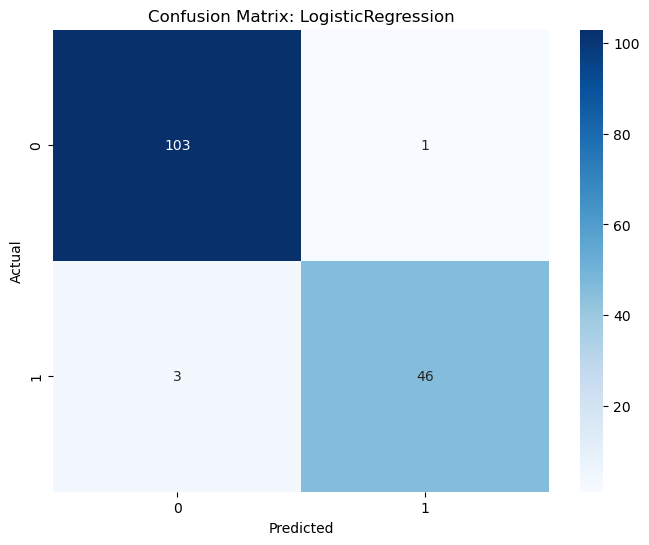

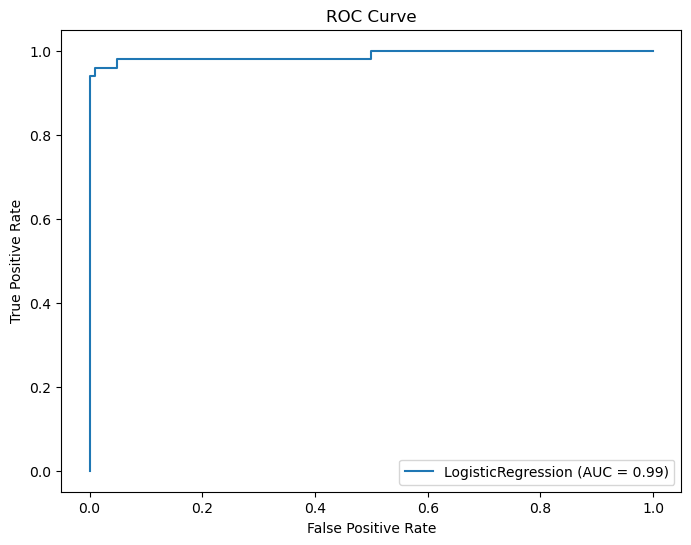

Evaluating K-Nearest Neighbors with Standardized data
Model: KNeighborsClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       104
           1       0.93      0.86      0.89        49

    accuracy                           0.93       153
   macro avg       0.93      0.91      0.92       153
weighted avg       0.93      0.93      0.93       153



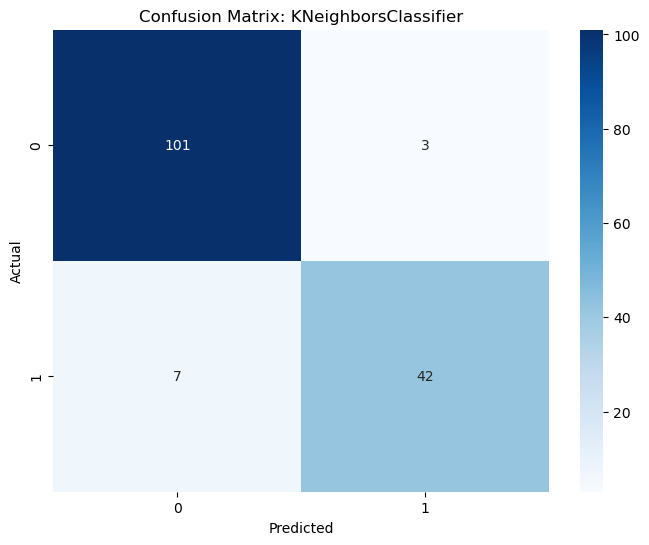

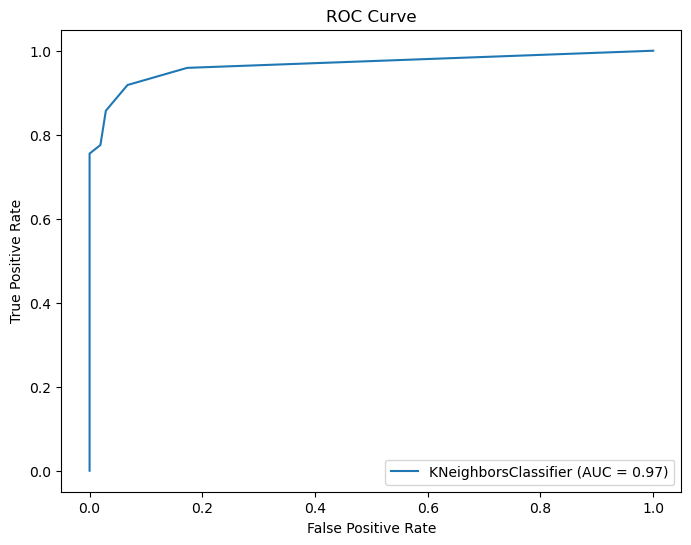

Evaluating Support Vector Machine with Standardized data
Model: SVC
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       104
           1       0.94      0.94      0.94        49

    accuracy                           0.96       153
   macro avg       0.95      0.95      0.95       153
weighted avg       0.96      0.96      0.96       153



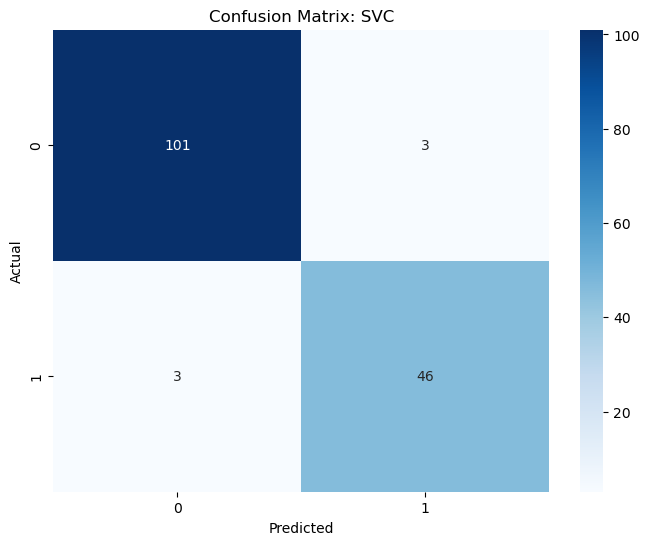

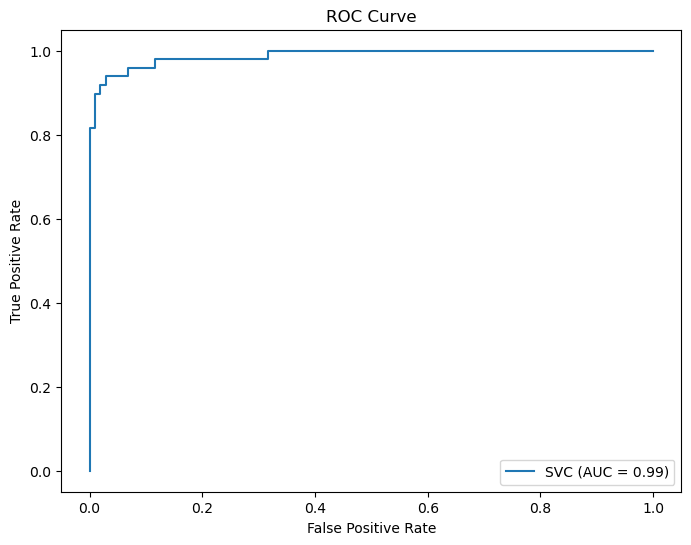

Evaluating Decision Tree with Standardized data
Model: DecisionTreeClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       104
           1       0.84      0.86      0.85        49

    accuracy                           0.90       153
   macro avg       0.89      0.89      0.89       153
weighted avg       0.90      0.90      0.90       153



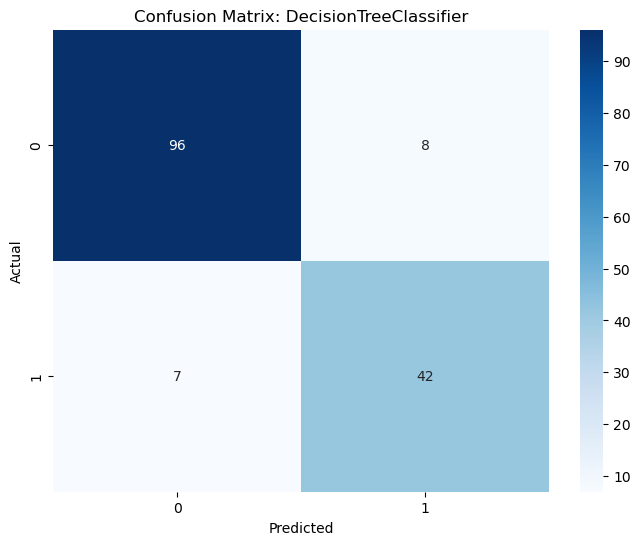

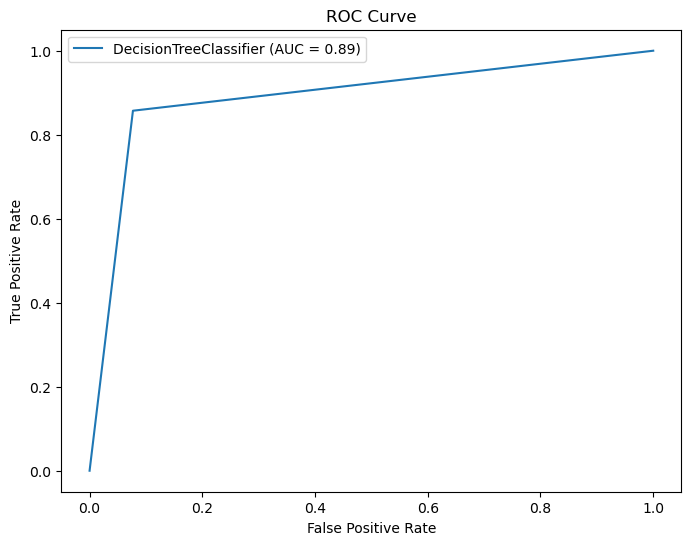

Evaluating Random Forest with Standardized data
Model: RandomForestClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       104
           1       0.94      0.90      0.92        49

    accuracy                           0.95       153
   macro avg       0.94      0.93      0.94       153
weighted avg       0.95      0.95      0.95       153



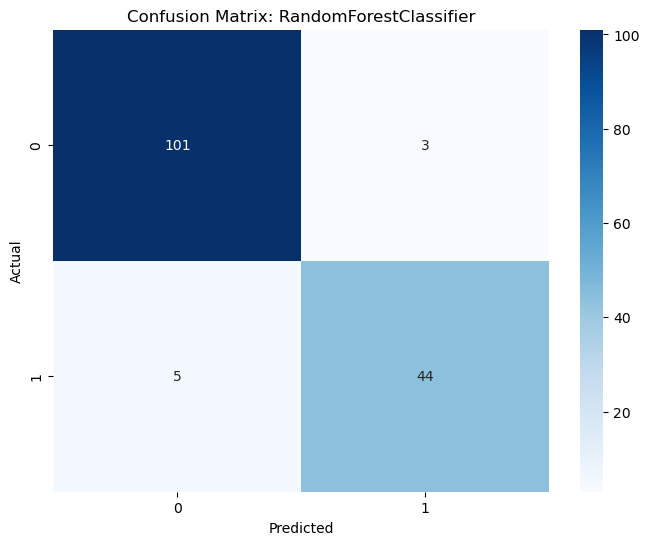

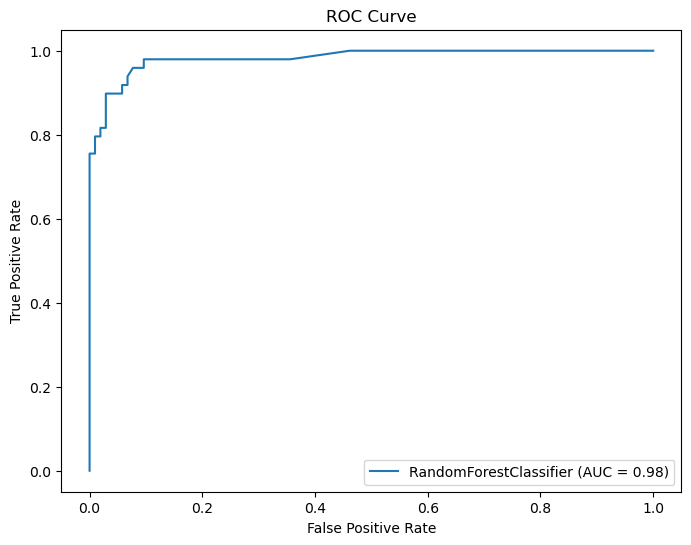

In [72]:
# function to evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict class labels and probabilities
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    # Accuracy, Precision, Recall, F1-score
    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {model.__class__.__name__}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Plot ROC curve and calculate AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{model.__class__.__name__} (AUC = {auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

    return classification_report(y_test, y_pred, output_dict=True), cm, auc

# Evaluate each model with Standardized data
for model_name, model in models.items():
    print(f"Evaluating {model_name} with Standardized data")
    cr, cm, auc = evaluate_model(model, X_train_standardized, X_test_standardized, y_train, y_test)
